<a href="https://colab.research.google.com/github/Shashank-Rawat/Credit-card-fraud-detection-system/blob/main/MA981_Dissertation_2204433_Credit_card_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uplaoding dataset from kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"shashankrawat","key":"0d8c5e4b8ec8e58b1b22b16f49bbc69b"}'}

In [ ]:
! mkdir ~/.kaggle
# copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/
# Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json
# downloading dataset from kaggle
!kaggle datasets download -d mlg-ulb/creditcardfraud
# unzipping the file
!unzip creditcardfraud.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Uplaoding Credit Card Dataset to Notebook

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Importing the dataset
df=pd.read_csv('creditcard.csv')

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# shape of the dataset
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

NO Missing Values in the dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


# 1. Descriptive Analysis:

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Percentage distribution of Different Class:

In [ ]:
print('Non-Fradulent Transaction in percentage:',round(df.Class.value_counts()[0]/df.shape[0]*100,2))
print('Fradulent Transaction in percentage:',round(df.Class.value_counts()[1]/df.shape[0]*100,2))

Non-Fradulent Transaction in percentage: 99.83
Fradulent Transaction in percentage: 0.17


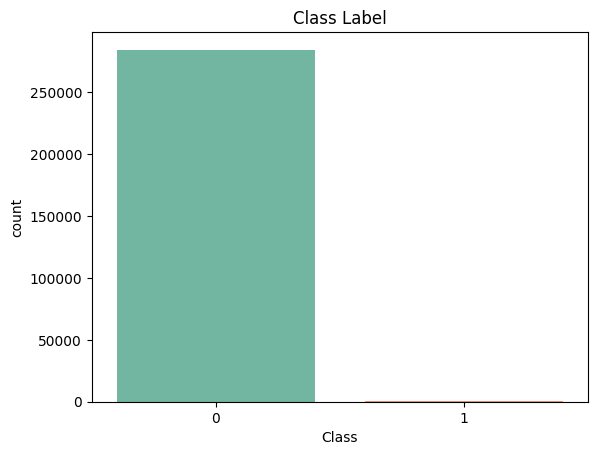

In [ ]:
sns.countplot(x = df['Class'], palette = "Set2")
plt.title('Class Label')
plt.show()

The Class distribution is highly imbalanced.

1. Exploratory Data Analysis.

In [ ]:
df.groupby(['Class'])['Amount'].max()

Class
0    25691.16
1     2125.87
Name: Amount, dtype: float64

In [ ]:
df['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

Time feature is the number of seconds elapsed between this transaction and the first transaction in the dataset

In [ ]:
# converting seconds into hours and binning them to 24 hours
df['Time_Hour']=df["Time"].apply(lambda x: np.ceil((float(x)/3600) % 24))
# Droping time coloumn
df.drop(columns=['Time'],inplace=True)
# shift column 'Time_hour' to first position
first_column = df.pop('Time_Hour')
df.insert(0, 'Time_Hour', first_column)
df.head()

,Time_Hour,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,1.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Replacing 0 hour to 1 hour in the Time_Hour Dataset
df['Time_Hour'] = df['Time_Hour'].replace(0, 1)
df.head()

,Time_Hour,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,1.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Time vs Frauds**

In [ ]:
# Transaction frequency over time(hour)
count_nf= df[df['Class']==0].groupby('Time_Hour').count()["Class"]
# Transaction frequency over time(Hour)
count_F = df[df['Class']==1].groupby('Time_Hour').count()["Class"]

# Making a dataframe
counts_df = pd.concat([count_nf, count_F], axis=1, keys=["Non Fraudulent", "Fraudulent"]).fillna(0)
df_time = counts_df.reset_index()
df_time

,Time_Hour,Non Fraudulent,Fraudulent
0,1.0,7690,6
1,2.0,4212,10
2,3.0,3269,57
3,4.0,3476,17
4,5.0,2185,23
5,6.0,2979,11
6,7.0,4093,9
7,8.0,7219,23
8,9.0,10266,9
9,10.0,15824,16


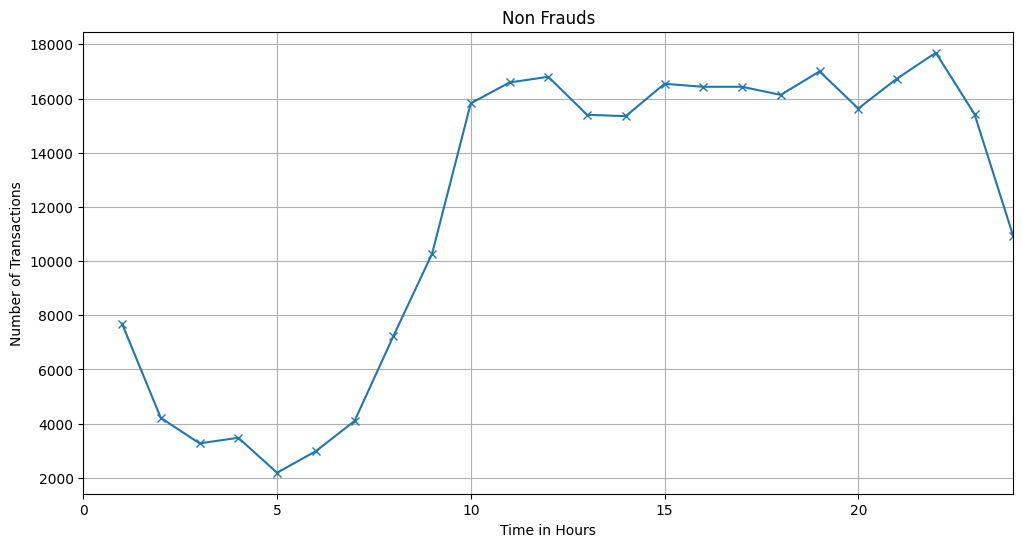

In [ ]:
# Line Plot of Non-Fraud activities over hours.
plt.figure(figsize=(12, 6))
plt.plot(df_time['Time_Hour'], df_time['Non Fraudulent'], marker='x')
plt.xlim(0, 24)

plt.xlabel('Time in Hours')
plt.ylabel('Number of Transactions')
plt.title('Non Frauds')


plt.grid(True)
plt.show()

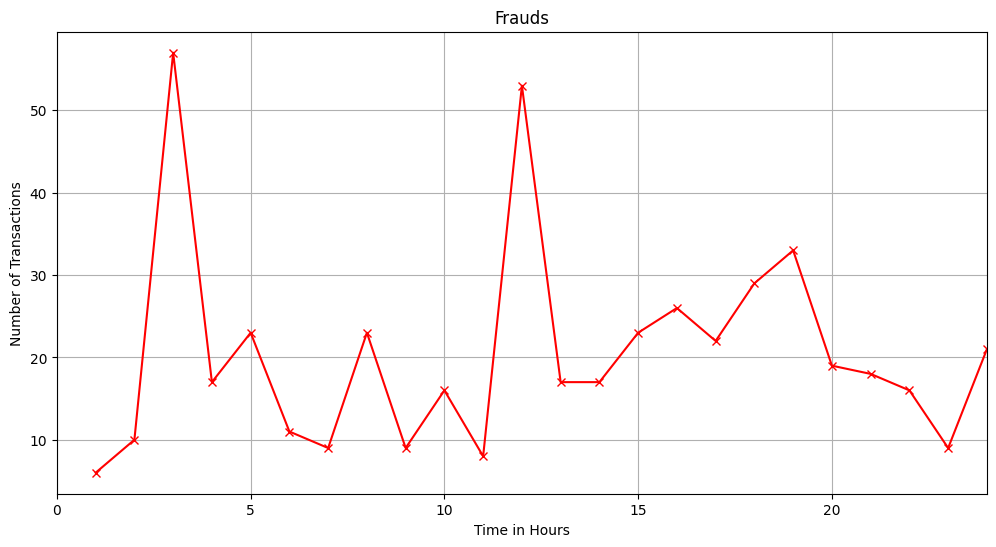

In [ ]:
# Line Plot of Fraudulent activities over hours.
plt.figure(figsize=(12, 6))
plt.plot(df_time['Time_Hour'], df_time['Fraudulent'], marker='x',color='red')
plt.xlim(0, 24)

plt.xlabel('Time in Hours')
plt.ylabel('Number of Transactions')
plt.title('Frauds')


plt.grid(True)
plt.show()

From the above line Plot we can see that the Fraudulent activities are at the peak at the 03:00 hours and 12:00 hours of  all the Transactions

**Amount vs Fraud:**

In [ ]:
# grouping the data for amount of fraudulent transaction and time hour
Grouped_T_C = df.groupby(['Time_Hour', 'Class'])['Amount'].aggregate([ 'max', 'sum', 'mean']).reset_index()
Grouped_df = pd.DataFrame(Grouped_T_C)
Grouped_df.columns = ['Hour', 'Class', 'Max', 'Sum', 'Mean']
Grouped_df.head()

,Hour,Class,Max,Sum,Mean
0,1.0,0,7712.43,462498.08,60.142793
1,1.0,1,829.41,1820.07,303.345000
2,2.0,0,2481.60,263171.24,62.481301
3,2.0,1,600.73,1279.32,127.932000
4,3.0,0,18910.00,229077.60,70.075742


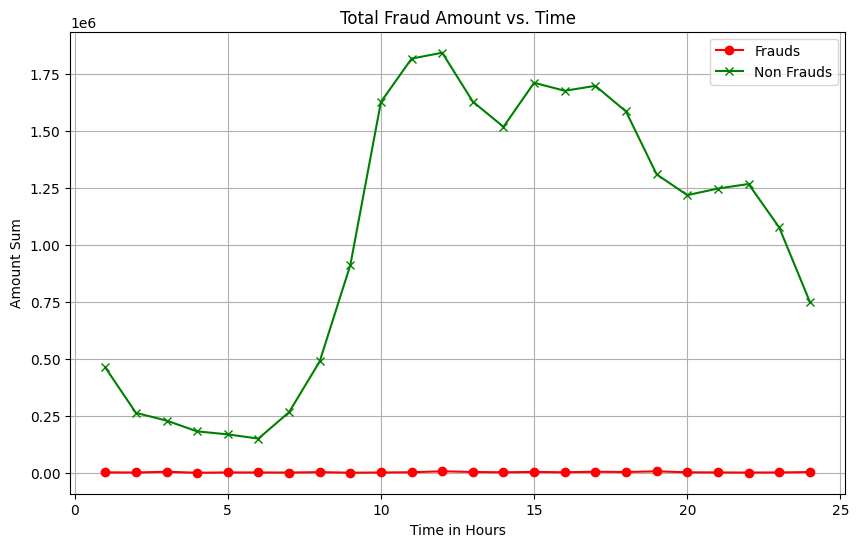

In [ ]:
# Plot of total amount of fraud vs Time(hour)
plt.figure(figsize=(10, 6))
plt.plot(Grouped_df.loc[Grouped_df['Class'] == 1, 'Hour'], Grouped_df.loc[Grouped_df['Class'] == 1, 'Sum'], marker='o',color='red', label='Frauds')
plt.plot(Grouped_df.loc[Grouped_df['Class'] == 0, 'Hour'], Grouped_df.loc[Grouped_df['Class'] == 0, 'Sum'], marker='x',color='green', label='Non Frauds')

plt.xlabel('Time in Hours')
plt.ylabel('Amount Sum')
plt.title('Total Fraud Amount vs. Time')
plt.legend()

plt.grid(True)
plt.show()

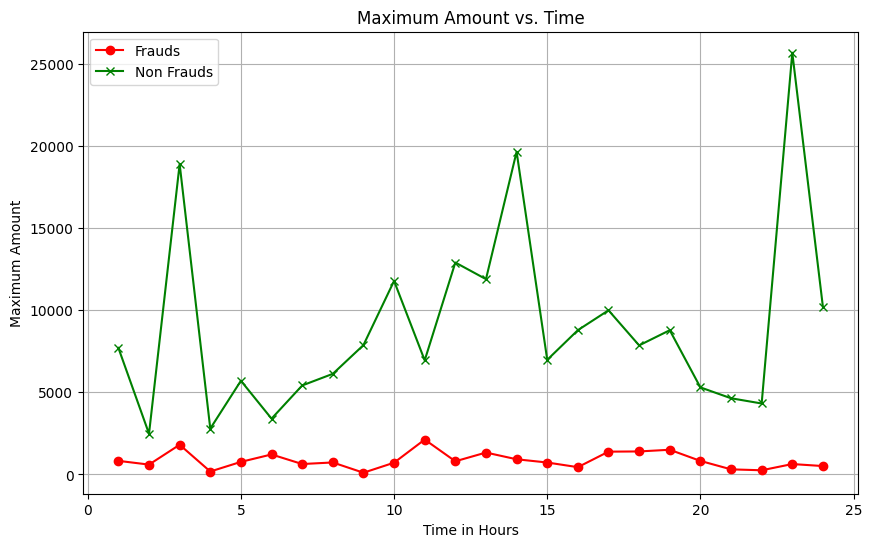

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Grouped_df.loc[Grouped_df['Class'] == 1, 'Hour'], Grouped_df.loc[Grouped_df['Class'] == 1, 'Max'], marker='o',color='red', label='Frauds')
plt.plot(Grouped_df.loc[Grouped_df['Class'] == 0, 'Hour'], Grouped_df.loc[Grouped_df['Class'] == 0, 'Max'], marker='x',color='green', label='Non Frauds')


plt.xlabel('Time in Hours')
plt.ylabel('Maximum Amount')
plt.title('Maximum Amount vs. Time')
plt.legend()
plt.grid(True)
plt.show()

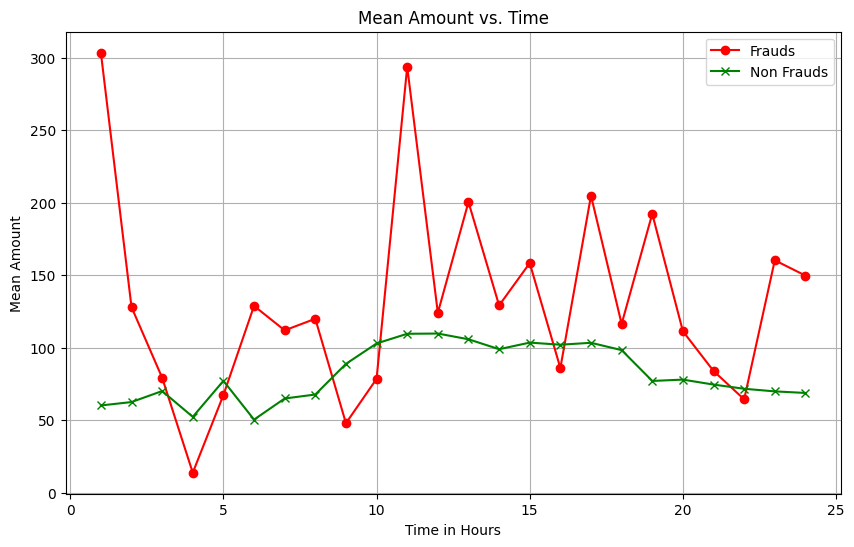

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Grouped_df.loc[Grouped_df['Class'] == 1, 'Hour'], Grouped_df.loc[Grouped_df['Class'] == 1, 'Mean'], marker='o',color='red', label='Frauds')
plt.plot(Grouped_df.loc[Grouped_df['Class'] == 0, 'Hour'], Grouped_df.loc[Grouped_df['Class'] == 0, 'Mean'], marker='x',color='green', label='Non Frauds')

plt.xlabel('Time in Hours')
plt.ylabel('Mean Amount')
plt.title('Mean Amount vs. Time')
plt.legend()

plt.grid(True)
plt.show()

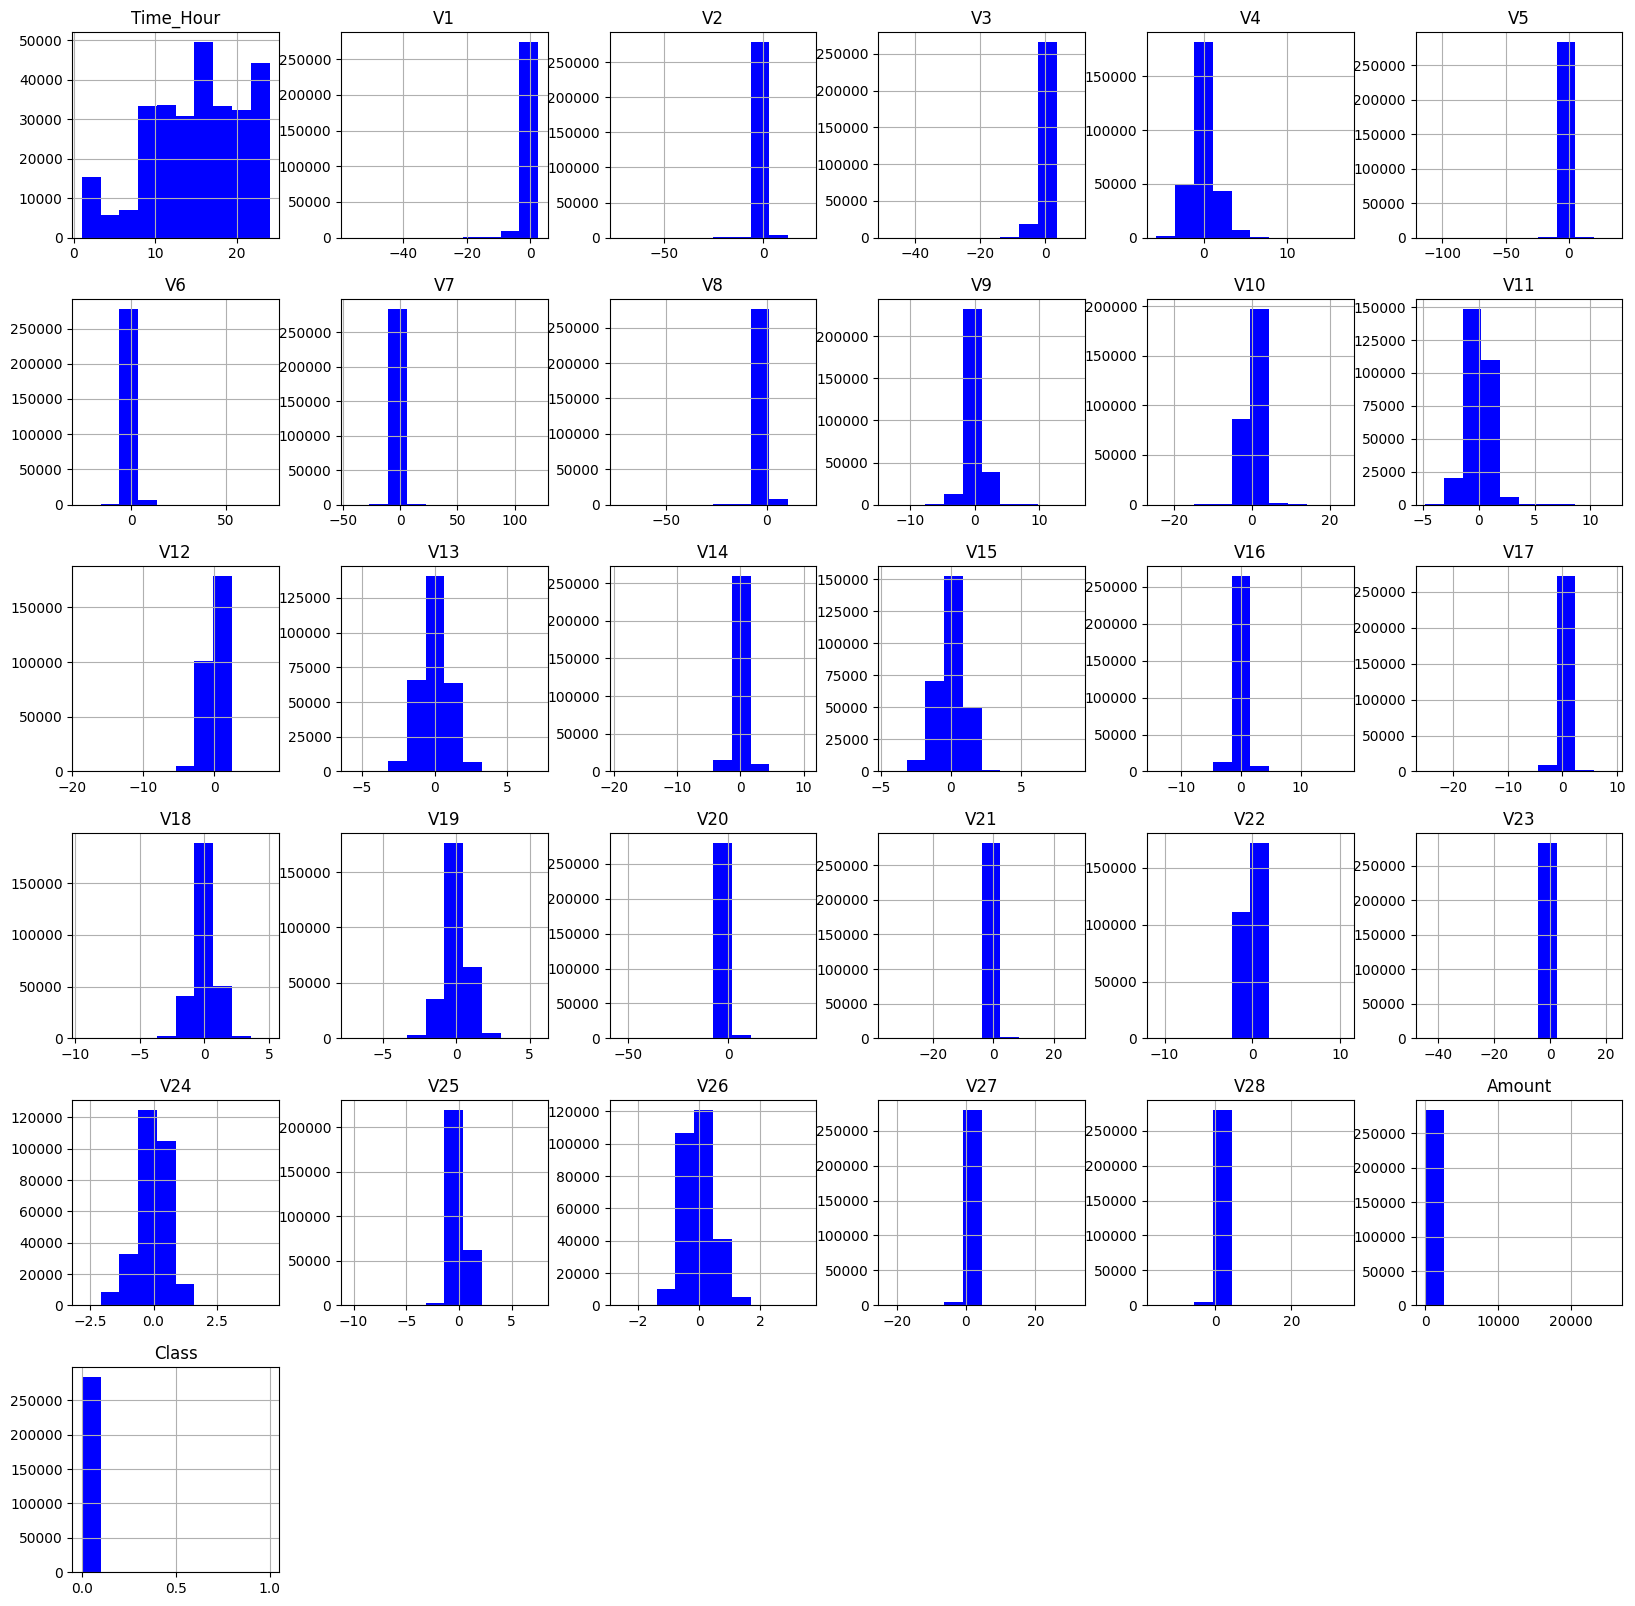

In [ ]:
# histogram for each feature in the dataset.
df.hist(figsize = (20, 20),color='blue')
plt.show()

**Correlation Check**

In [ ]:
# Making a copy of the dataframe.
df1=df.copy()
df1.head()

,Time_Hour,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,1.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


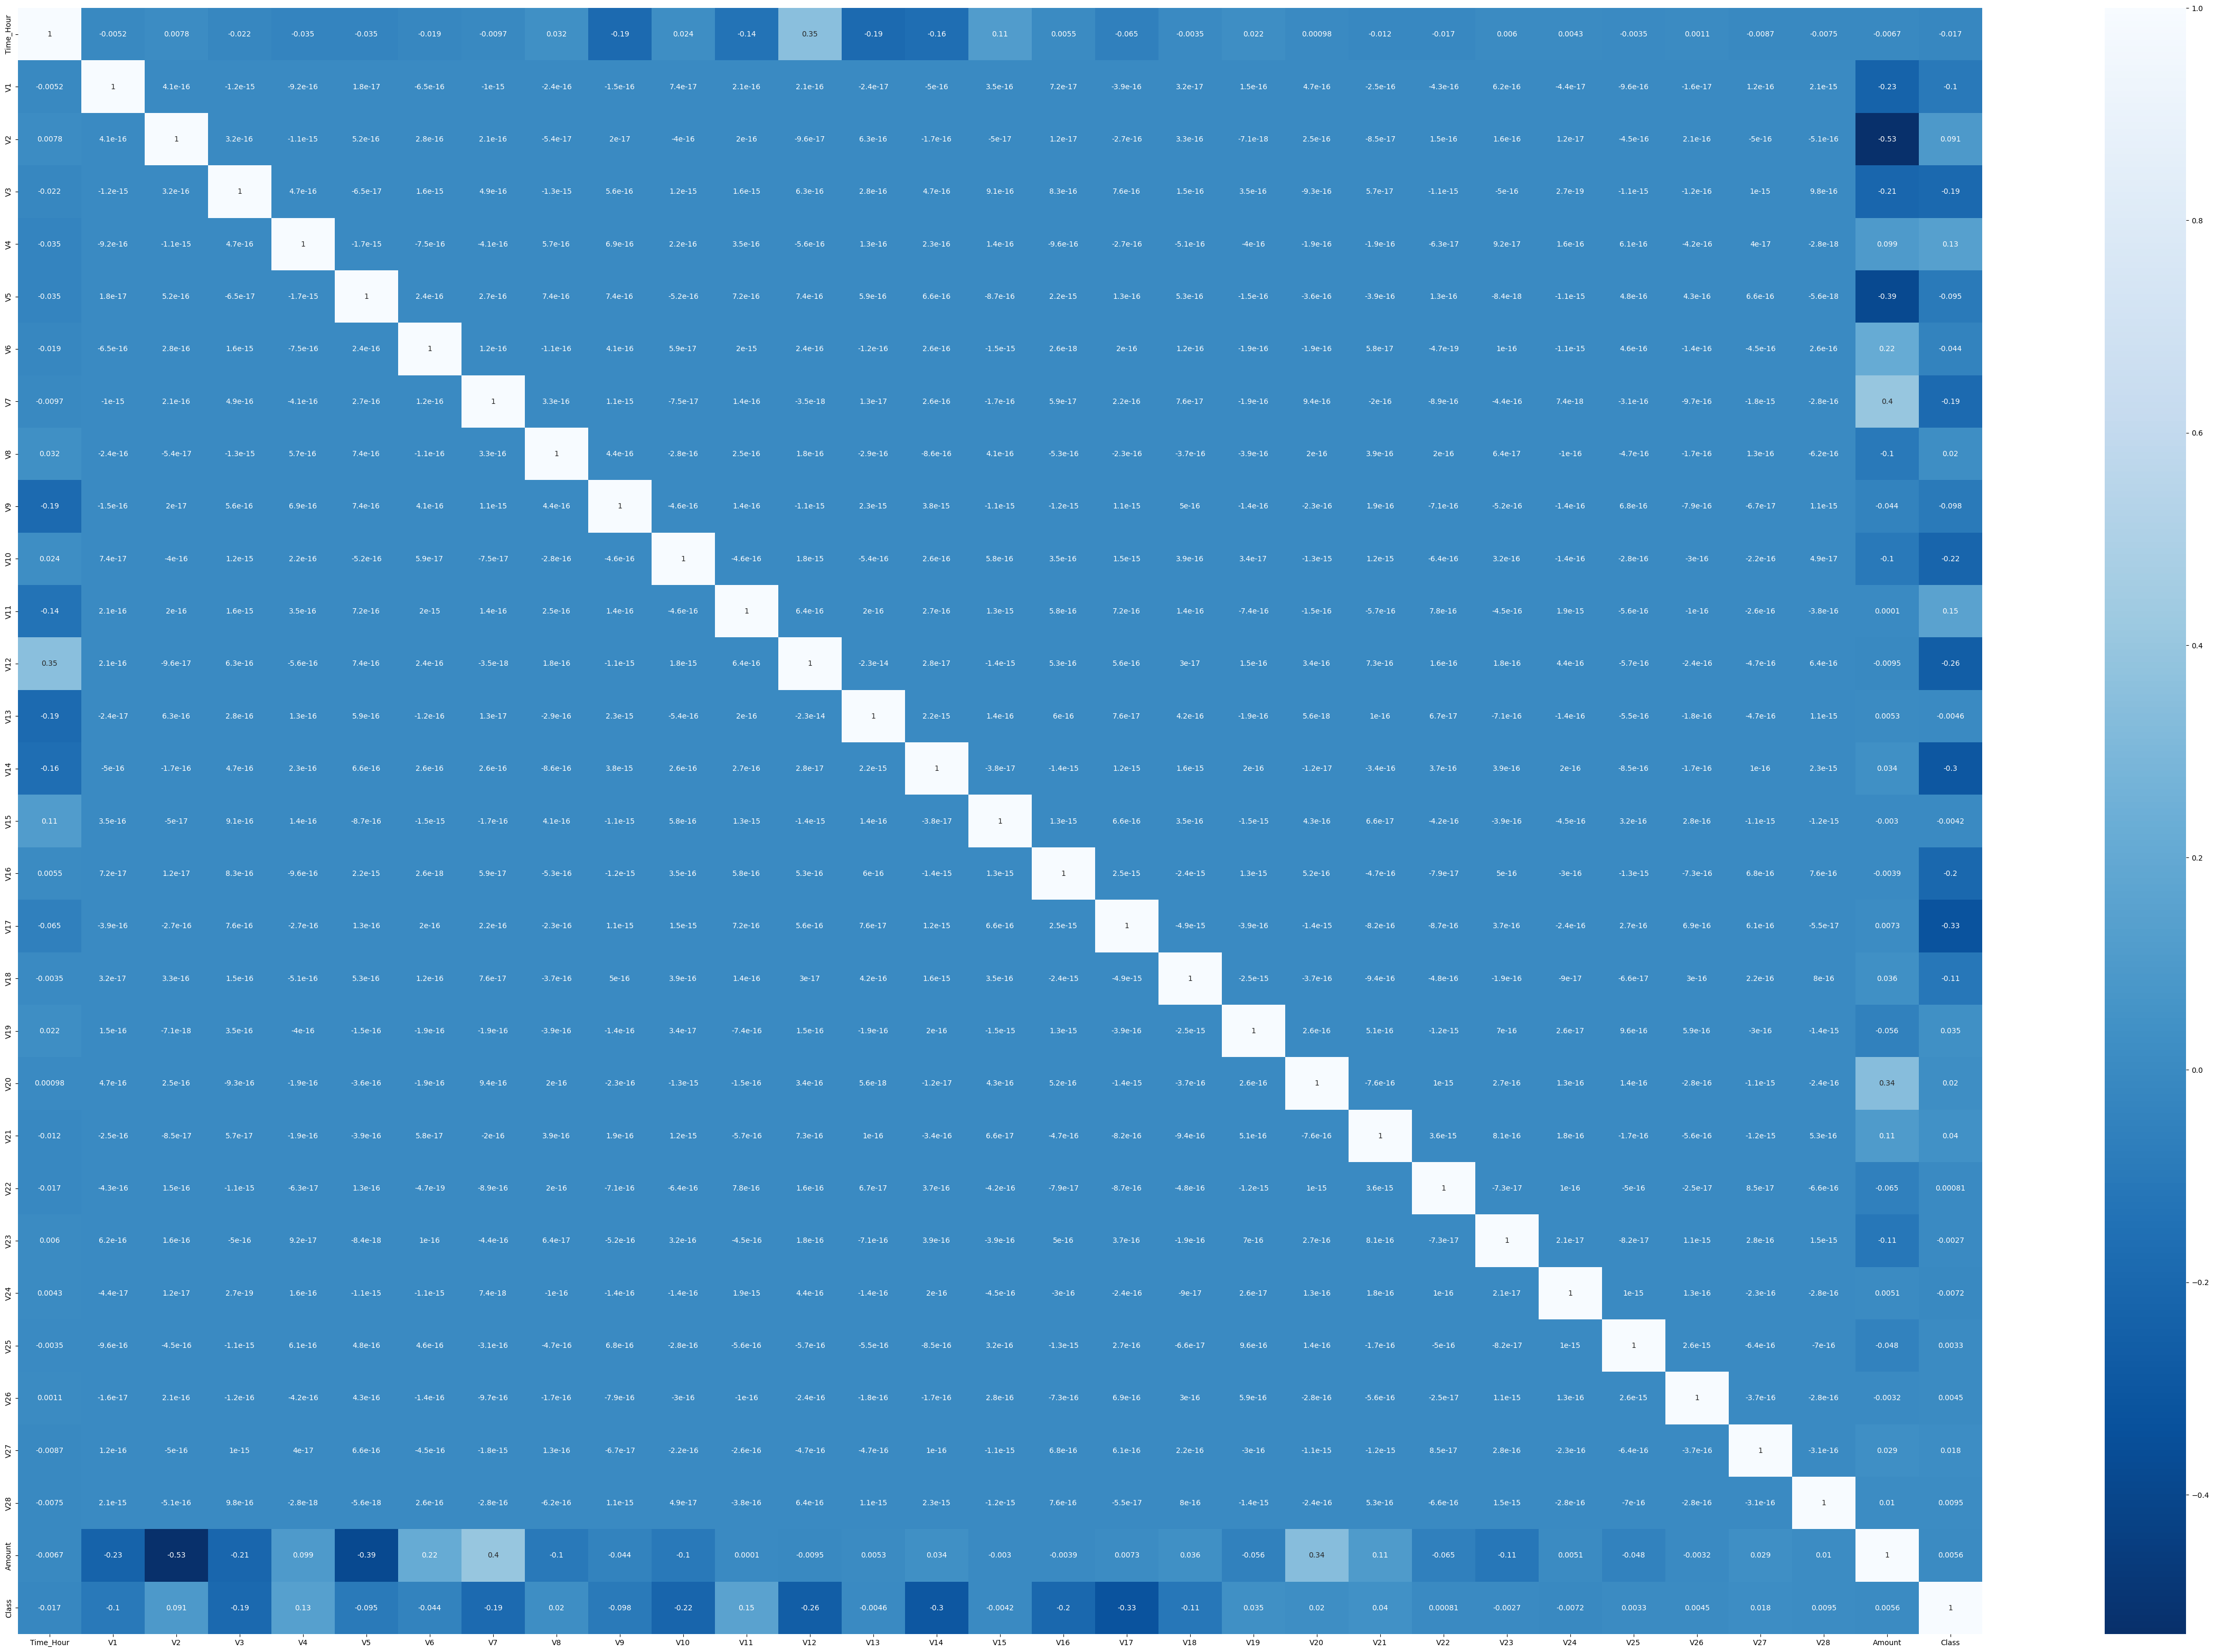

In [ ]:
# correlation matrix
corr_matrix = df1.corr()
# Heatmap of correlation matrix
plt.figure(figsize = (60, 40))
sns.heatmap(corr_matrix, annot=True,cmap=plt.cm.Blues_r)
plt.show()

In [ ]:
# udf for selecting features with more correlation more than threshold:
def corr_threshold(dataset,threshold):
    cor_col=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                cor_col.add(corr_matrix.columns[i])
    return cor_col

In [ ]:
# checking for the features with correlation coefficient more than 0.5
feature=corr_threshold(df1,0.5)
print('Total feature:',len(feature))
print('Correlated features:',feature)

Total feature: 1
Correlated features: {'Amount'}


By correlation plot we can observe that only independent features 'Amount' and 'V2' are correlated to each other.

# 2. Data Preprocessing:

<Axes: xlabel='Time_Hour', ylabel='Density'>

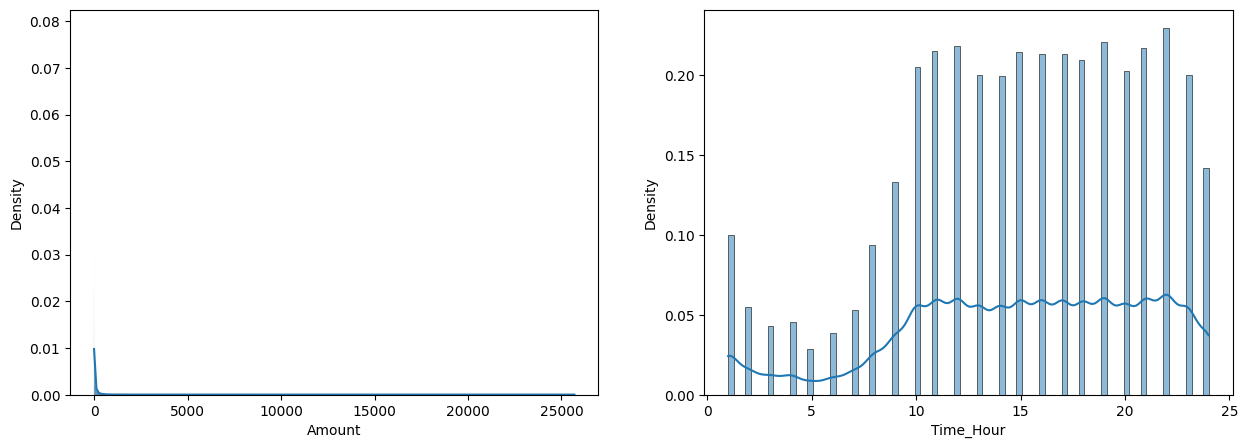

In [ ]:
fig, axis = plt.subplots(1, 2, figsize =(15, 5))
sns.histplot(df['Amount'], ax=axis[0], kde=True,stat="density")
sns.histplot(df['Time_Hour'], ax=axis[1], kde=True,stat="density")

In [ ]:
# Skewness Check
print("The skewness of the Amount feature is: ", df['Amount'].skew())
print("The skewness of the Time feature is: ", df['Time_Hour'].skew())

The skewness of the Amount feature is:  16.977724453761024
The skewness of the Time feature is:  -0.4904768416555082


From the above plot we can see the that feature Amount  is extreme possitve skewed and Time feature is negative skewed

**Train-Test Split**

In [ ]:
df1.head()

,Time_Hour,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,1.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Standarizing the Data**

In [ ]:
# importing library
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()

In [ ]:
selcted_coloumns = ['Amount', 'Time_Hour']
# scaling the coloumn
data_scaled = scale.fit_transform(df1[selcted_coloumns])
# making a dataframe with selected scaled features
scaled_df = pd.DataFrame(data_scaled, columns=selcted_coloumns)
# combining the scaled features in the dataframe and dropping unscaled coloumns
df1 = pd.concat([scaled_df, df1.drop(columns=selcted_coloumns)], axis=1)

In [ ]:
df1.head()

,Amount,Time_Hour,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-1.666667,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-1.666667,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-1.666667,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-1.666667,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-1.666667,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
# atratified train test split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split
X=df1.drop(["Class"],axis=1)
y=df1["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, test_size = 0.25,random_state=123)
# scaling train and test data
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)


In [ ]:
print('Traing dataset size:',X_train.shape[0])
print('Test dataset size:',X_test.shape[0])

Traing dataset size: 213605
Test dataset size: 71202


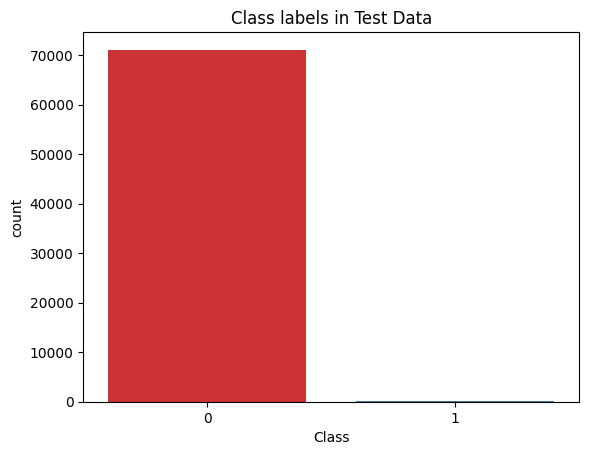

In [ ]:
# Histogram of class in test data
sns.countplot(x = y_test, palette = "Set1")
plt.title('Class labels in Test Data')
plt.show()

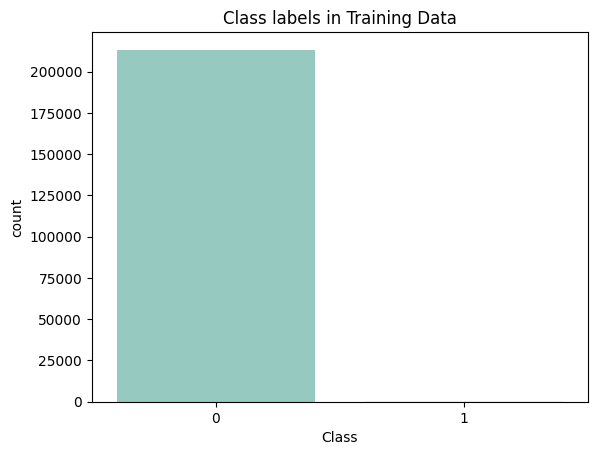

In [ ]:
# Histogram of class labe in Training data
sns.countplot(x = y_train, palette = "Set3")
plt.title('Class labels in Training Data')
plt.show()

# 3. Model Building and its Evaluation

Imprting necessary libraries

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score, confusion_matrix, f1_score, precision_score, average_precision_score, roc_auc_score,  recall_score,  precision_recall_curve #some scoring functions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier




# 1.Logistic Regression:

**1.Base Logistic Regression Model:**

In [ ]:
# hyperparameter tunning for Logistic Regression:
param_grid_log = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
}

In [ ]:
# Grid search cv for hyperparameter tunning
log_reg=LogisticRegression()
cv = KFold(5,random_state=123,shuffle=True)
grid_search_logreg_base = GridSearchCV(log_reg, param_grid_log, cv=cv, scoring='roc_auc', n_jobs=-1)

In [ ]:
# Fitting the model:
grid_search_logreg_base.fit(X_train, y_train)
best_param_log = grid_search_logreg_base.best_estimator_
best_param_log

LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
base_log_reg=LogisticRegression(C=0.1,solver='liblinear',random_state=123)
# fitting the model:
base_log_reg.fit(X_train,y_train)
y_pred_log=base_log_reg.predict(X_test)


In [ ]:
# Classification Report:
print("Base Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

Base Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.87      0.58      0.69       123

    accuracy                           1.00     71202
   macro avg       0.93      0.79      0.85     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
# Calculating Evaluation Matrices
accuracy_b_lr=base_log_reg.score(X_test,y_test)
precision_b_lr, recall_b_lr, f1_b_lr, sup_b_lr = classification_report(y_test, y_pred_log, output_dict=True)['1'].values()
roc_auc_b_lr=roc_auc_score(y_test,y_pred_log)
roc_auc_b_lr

0.7885405074875464

**Confusion Matrix**

In [ ]:
cm = metrics.confusion_matrix( y_test,y_pred_log)
cm

array([[71068,    11],
       [   52,    71]])

Text(0.5, 23.52222222222222, 'Predicted label')

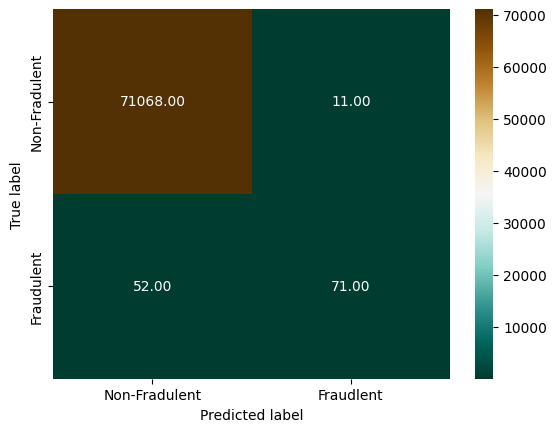

In [ ]:
sns.heatmap(cm, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

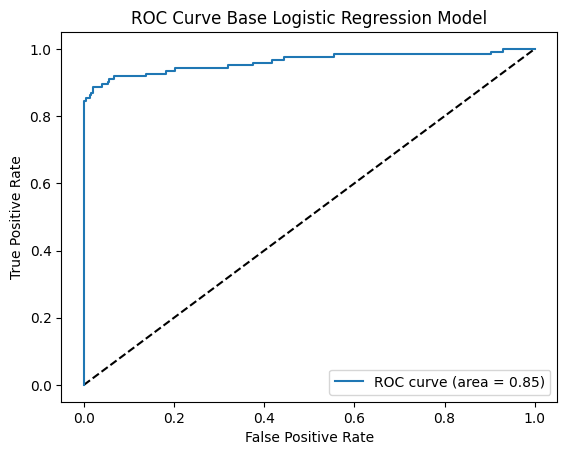

In [ ]:
# ROC_AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,base_log_reg.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Base Logistic Regression Model")
plt.legend()
plt.show()

In [ ]:
# Creating Dataframe for Evalating logistic regression model:
Evaluation_log=pd.DataFrame(columns=['Model Name','Accuracy','Precision', 'Recall', 'F1-Score', 'ROC AUC'])

In [ ]:
base_Log_row= pd.Series({'Model Name': 'Base Logistic Regression', 'Accuracy': accuracy_b_lr, 'Precision': precision_b_lr, 'Recall': recall_b_lr, 'F1-Score': f1_b_lr, 'ROC AUC': roc_auc_b_lr})
Evaluation_log=Evaluation_log.append(base_Log_row, ignore_index=True)
Evaluation_log

<ipython-input-144-664266e2c248>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_log=Evaluation_log.append(base_Log_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Base Logistic Regression,0.999115,0.865854,0.577236,0.692683,0.788541


**2. Feature Selction using RFE**

In [ ]:
min_features_to_select = 1  # Minimum number of features to consider
cv = StratifiedKFold(5)

rfecv_logreg = RFECV(
    estimator=base_log_reg,
    step=1,
    cv=cv,
    scoring="roc_auc",
    min_features_to_select=min_features_to_select,
    n_jobs=-1,
    verbose=True
)
rfecv_logreg.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv_logreg.n_features_}")

Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Optimal number of features: 15


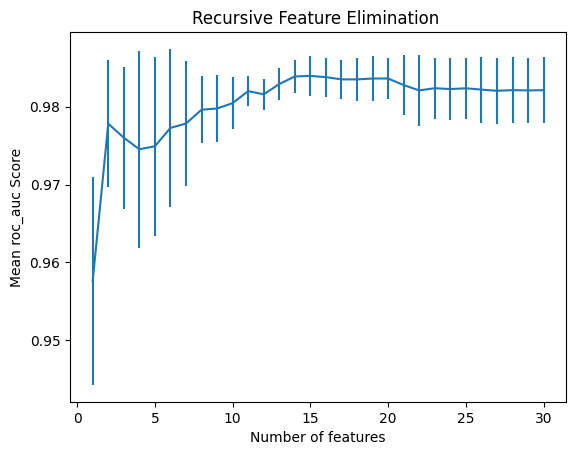

In [ ]:
n_scores = len(rfecv_logreg.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Mean roc_auc Score")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv_logreg.cv_results_["mean_test_score"],
    yerr=rfecv_logreg.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination ")
plt.show()

In [ ]:
# Getting Index of the most important features.
feature_indices = [index for index, value in enumerate(rfecv_logreg.support_) if value==True]
print(feature_indices)

[0, 4, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 21, 22, 25]


In [ ]:
# making a dataframe with selected features
log_rfe_df=df1.iloc[:,[0, 4, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 21, 22, 25,30]]
log_rfe_df.head()

,Amount,V3,V5,V7,V8,V9,V10,V11,V12,V13,V15,V16,V20,V21,V24,Class
0,1.783274,2.536347,-0.338321,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,1.468177,-0.470401,0.251412,-0.018307,0.066928,0
1,-0.269825,0.166480,0.060018,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,0.635558,0.463917,-0.069083,-0.225775,-0.339846,0
2,4.983721,1.773209,-0.503198,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,2.345865,-2.890083,0.524980,0.247998,-0.689281,0
3,1.418291,1.792993,-0.010309,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.631418,-1.059647,-0.208038,-0.108300,-1.175575,0
4,0.670579,1.548718,-0.407193,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,0.175121,-0.451449,0.408542,-0.009431,0.141267,0


In [ ]:
log_rfe_df.columns

Index(['Amount', 'V3', 'V5', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
       'V15', 'V16', 'V20', 'V21', 'V24', 'Class'],
      dtype='object')

**Train-test split**

In [ ]:
X_reduced=log_rfe_df.drop(["Class"],axis=1)
y_reduced=log_rfe_df["Class"]
X_reduced_train,X_reduced_test,y_reduced_train,y_reduced_test=train_test_split(X_reduced,y_reduced,stratify=y, test_size = 0.25,random_state=123)
# Standarising the train test data
X_reduced_train=scale.fit_transform(X_train)
X_reduced_test=scale.fit_transform(X_test)

In [ ]:
# Hyperparameter tunning for reduced model:
grid_search_logreg_base.fit(X_reduced_train, y_reduced_train)
best_param_log = grid_search_logreg_base.best_estimator_
best_param_log

LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
log_reg_rfe=LogisticRegression(C=10,solver='liblinear',random_state=123)
# fitting the model:
log_reg_rfe.fit(X_reduced_train,y_reduced_train)
y_pred_log_rfe=log_reg_rfe.predict(X_reduced_test)

In [ ]:
# Comparing Scoring ROC_AUC score of training and test dataset.
roc_auc_scores_train=cross_val_score(log_reg_rfe, X_reduced_train, y_reduced_train, cv=5, scoring='roc_auc')
roc_auc_scores_test = cross_val_score(log_reg_rfe, X_reduced_test, y_reduced_test, cv=5, scoring='roc_auc')
print(roc_auc_scores_train)
print(roc_auc_scores_test)
print("Mean score of Roc_auc Train:" ,round((roc_auc_scores_train.mean()),4))
print("Mean score of Roc_auc Test:" ,round((roc_auc_scores_test.mean()),4))

[0.967168   0.97694398 0.97952678 0.9838251  0.97677065]
[0.95445695 0.893278   0.9631753  0.98543308 0.97563419]
Mean score of Roc_auc Train: 0.9768
Mean score of Roc_auc Test: 0.9544


In [ ]:
print("Classification Report Logistic Regression with reduced feature :")
print(classification_report(y_reduced_test, y_pred_log_rfe))

Classification Report Logistic Regression with reduced feature :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.86      0.59      0.70       123

    accuracy                           1.00     71202
   macro avg       0.93      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
accuracy_r_lr=log_reg_rfe.score(X_reduced_test,y_reduced_test)
precision_r_lr, recall_r_lr, f1_r_lr, sup_r_lr = classification_report(y_reduced_test, y_pred_log_rfe, output_dict=True)['1'].values()
roc_auc_r_lr=roc_auc_score(y_reduced_test,y_pred_log_rfe)
roc_auc_r_lr

0.7966635543618763

**Confusion Matrix**

Text(0.5, 23.52222222222222, 'Predicted label')

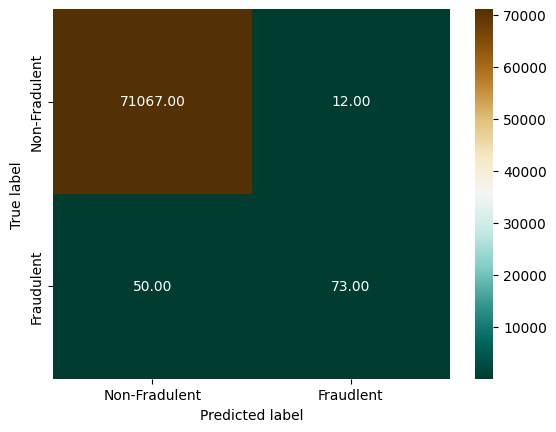

In [ ]:
cm_1= metrics.confusion_matrix( y_reduced_test,y_pred_log_rfe)
sns.heatmap(cm_1, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

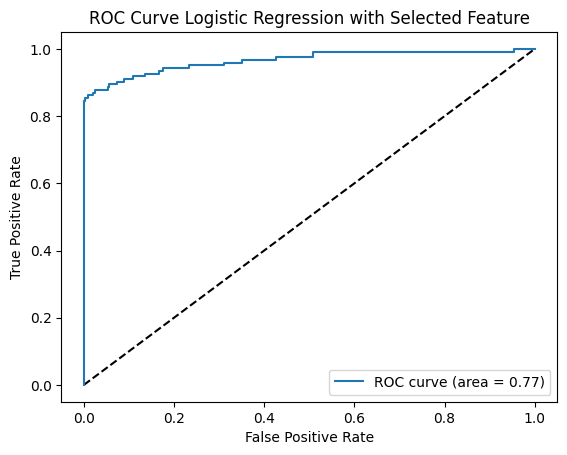

In [ ]:
# roc_auc curve
fpr, tpr, thresholds = metrics.roc_curve(y_reduced_test,  log_reg_rfe.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Logistic Regression with Selected Feature")
plt.legend()
plt.show()

In [ ]:
# Updating Evaluation dataframe
rfe_Log_row= pd.Series({'Model Name': 'Reduced Logistic Regression', 'Accuracy': accuracy_r_lr, 'Precision': precision_r_lr, 'Recall': recall_r_lr, 'F1-Score': f1_r_lr, 'ROC AUC': roc_auc_r_lr})
Evaluation_log=Evaluation_log.append(rfe_Log_row, ignore_index=True)
Evaluation_log

<ipython-input-157-92c2484fa305>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_log=Evaluation_log.append(rfe_Log_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Base Logistic Regression,0.999115,0.865854,0.577236,0.692683,0.788541
1,Reduced Logistic Regression,0.999129,0.858824,0.593496,0.701923,0.796664


Logistic Regression model with all the feature gives 99.91% accuracy which can be misleading in imbalanced classification data. model gives precision and recall of .8658 and .5772 respectively. 0.0154% of non fradulent transaction are flagged as Fraud. whereas, only 57.72% fraud were correctly classified as frauds.

After selecting important features using RFE, Logistic Regression gives 99.91% accuracy. and Precision of 0.8588 and recall of 0.5934. 59.34% of the fraudeulant transcation were correctly classified.

Though the feature selection doesn't improve the model by much, model with Less feature is faster than the model with all features.

So, choosing the Logistic Regression with selected features as the best Logistic Regression model.

In [ ]:
# Creating Final Evaluation Model.
Final_Evaluation_df = pd.DataFrame(columns=['Model Name','Accuracy','Precision', 'Recall', 'F1-Score', 'ROC AUC'])

In [ ]:
# Updating best logistic Regrssion scores to the final evaluation dataframe
log_score= pd.Series({'Model Name': 'Logistic Regression', 'Accuracy': accuracy_r_lr, 'Precision': precision_r_lr, 'Recall': recall_r_lr, 'F1-Score': f1_r_lr, 'ROC AUC': roc_auc_r_lr})
Final_Evaluation_df = Final_Evaluation_df.append(log_score, ignore_index=True)
Final_Evaluation_df

<ipython-input-159-144f403ad310>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Final_Evaluation_df = Final_Evaluation_df.append(log_score, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.999129,0.858824,0.593496,0.701923,0.796664


# 2.Decision Tree:

In [ ]:
# hyperparameter grid for decision tree
param_grid_decsion = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
dt_clf=DecisionTreeClassifier()
cv = KFold(5,random_state=123,shuffle=True)
grid_search_dt_clf = GridSearchCV(dt_clf, param_grid_decsion, cv=cv, scoring='roc_auc', n_jobs=-1)

In [ ]:
# Fitting the model:
grid_search_dt_clf.fit(X_train, y_train)
best_param = grid_search_dt_clf.best_estimator_
best_param

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=10)

In [ ]:
base_dt_clf=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,min_samples_split=10,random_state=123)
# fitting the model:
base_dt_clf.fit(X_train,y_train)
y_pred_dt_clf=base_dt_clf.predict(X_test)

In [ ]:
print("Base Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt_clf))

Base Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.91      0.71      0.79       123

    accuracy                           1.00     71202
   macro avg       0.95      0.85      0.90     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
accuracy_b_dt=base_dt_clf.score(X_test,y_test)
precision_b_dt, recall_b_dt, f1_b_dt, sup_b_dt = classification_report(y_test, y_pred_dt_clf, output_dict=True)['1'].values()
roc_auc_b_dt=roc_auc_score(y_test,y_pred_dt_clf)
roc_auc_b_dt

0.8535952267470169

**Confusion Matrix**

In [ ]:
cm = metrics.confusion_matrix( y_test,y_pred_dt_clf)
cm

array([[71070,     9],
       [   36,    87]])

Text(0.5, 23.52222222222222, 'Predicted label')

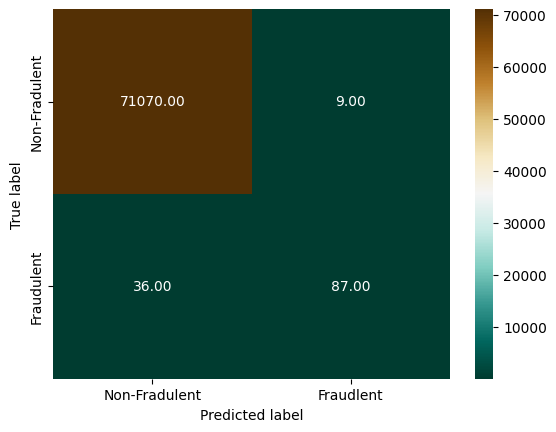

In [ ]:
sns.heatmap(cm, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

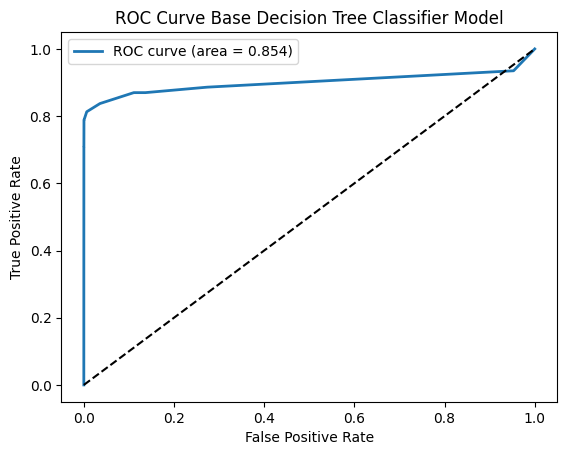

In [ ]:
# roc_auc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, base_dt_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr,lw=2, label='ROC curve (area = {:0.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Base Decision Tree Classifier Model")
plt.legend()
plt.show()

In [ ]:
# Creating Dataframe for Evalating logistic regression model:
Evaluation_DT=pd.DataFrame(columns=['Model Name','Accuracy','Precision', 'Recall', 'F1-Score', 'ROC AUC'])

In [ ]:
base_dt_row= pd.Series({'Model Name': 'Base Decision Tree Classifier', 'Accuracy': accuracy_b_dt, 'Precision': precision_b_dt, 'Recall': recall_b_dt, 'F1-Score': f1_b_dt, 'ROC AUC': roc_auc_b_dt})
Evaluation_DT=Evaluation_DT.append(base_dt_row, ignore_index=True)
Evaluation_DT

<ipython-input-180-a5c88416f615>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_DT=Evaluation_DT.append(base_dt_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Base Decision Tree Classifier,0.999368,0.90625,0.707317,0.794521,0.853595


**2. Feature Selction using RFE**

In [ ]:
# featuer selection using RFE
min_features_to_select = 1
cv = StratifiedKFold(5)

rfecv_dt = RFECV(
    estimator=base_dt_clf,
    step=1,
    cv=cv,
    scoring="roc_auc",
    min_features_to_select=min_features_to_select,
    n_jobs=-1,
)
rfecv_dt.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv_dt.n_features_}")

Optimal number of features: 4


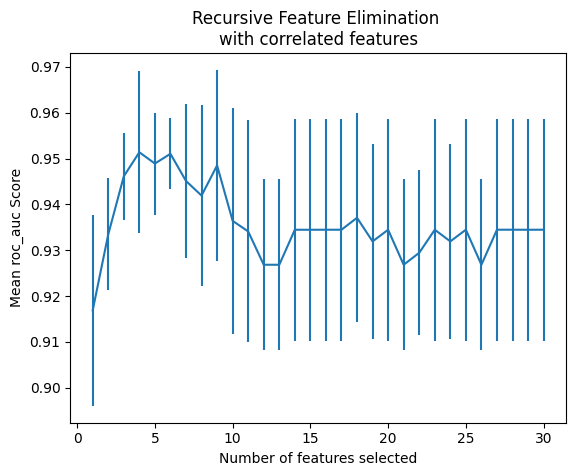

In [ ]:
n_scores = len(rfecv_dt.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean roc_auc Score")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv_dt.cv_results_["mean_test_score"],
    yerr=rfecv_dt.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination with features")
plt.show()

In [ ]:
# Getting Index of the most important features.
feature_indices = [index for index, value in enumerate(rfecv_dt.support_) if value==True]
print(feature_indices)

[10, 12, 14, 17]


In [ ]:
dt_rfe_df=df1.iloc[:,[10, 12, 14, 17,30]]
dt_rfe_df.head()

,V9,V11,V13,V16,Class
0,0.363787,-0.551600,-0.991390,-0.470401,0
1,-0.255425,1.612727,0.489095,0.463917,0
2,-1.514654,0.624501,0.717293,-2.890083,0
3,-1.387024,-0.226487,0.507757,-1.059647,0
4,0.817739,-0.822843,1.345852,-0.451449,0


**Train-test split**

In [ ]:
X_reduced=dt_rfe_df.drop(["Class"],axis=1)
y_reduced=dt_rfe_df["Class"]
X_reduced_train,X_reduced_test,y_reduced_train,y_reduced_test=train_test_split(X_reduced,y_reduced,stratify=y, test_size = 0.25,random_state=123)
# Standarising the train test data
X_reduced_train=scale.fit_transform(X_reduced_train)
X_reduced_test=scale.fit_transform(X_reduced_test)

In [ ]:
# Fitting the model:
grid_search_dt_clf.fit(X_reduced_train, y_reduced_train)
best_param = grid_search_dt_clf.best_estimator_
best_param

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=5)

In [ ]:
dt_rfe=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,min_samples_split=5,random_state=123)
# fitting the model:
dt_rfe.fit(X_reduced_train,y_reduced_train)
y_pred_dt_rfe=dt_rfe.predict(X_reduced_test)

In [ ]:
print("Classification Report Decision Tree Classifier with reduced feature :")
print(classification_report(y_reduced_test, y_pred_dt_rfe))

Classification Report Decision Tree Classifier with reduced feature :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.85      0.54      0.66       123

    accuracy                           1.00     71202
   macro avg       0.92      0.77      0.83     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
accuracy_r_dt=dt_rfe.score(X_reduced_test,y_reduced_test)
precision_r_dt, recall_r_dt, f1_r_dt, sup_r_dt = classification_report(y_reduced_test, y_pred_dt_rfe, output_dict=True)['1'].values()
roc_auc_r_dt=roc_auc_score(y_reduced_test,y_pred_dt_rfe)

**Confusion Matrix**

Text(0.5, 23.52222222222222, 'Predicted label')

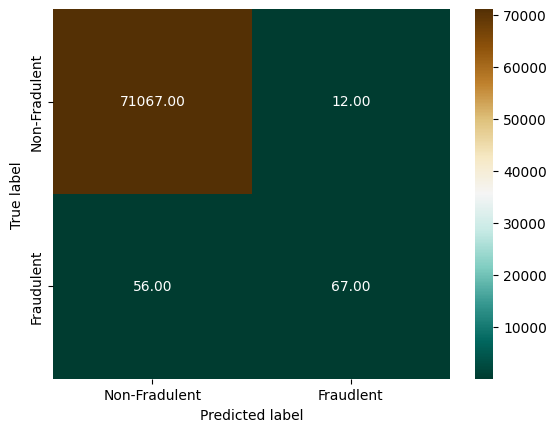

In [ ]:
cm_1= metrics.confusion_matrix( y_reduced_test,y_pred_dt_rfe)
sns.heatmap(cm_1, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

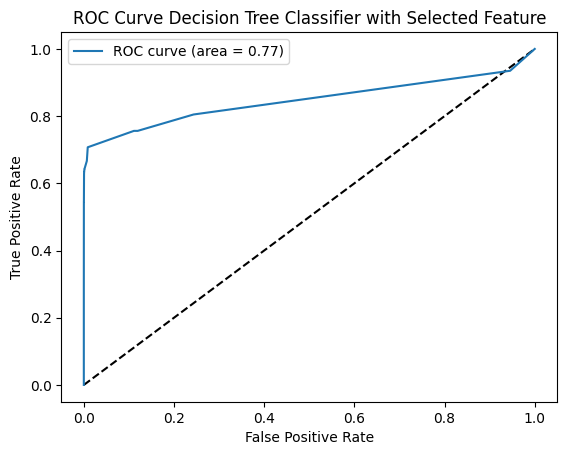

In [ ]:
# roc_auc curve
fpr, tpr, thresholds = metrics.roc_curve(y_reduced_test, dt_rfe.predict_proba(X_reduced_test)[:,1])
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Decision Tree Classifier with Selected Feature")
plt.legend()
plt.show()

In [ ]:
# Updating Evaluation dataframe
rfe_dt_row= pd.Series({'Model Name': 'Reduced Decision Tree', 'Accuracy': accuracy_r_dt, 'Precision': precision_r_dt, 'Recall': recall_r_dt, 'F1-Score': f1_r_dt, 'ROC AUC': roc_auc_r_dt})
Evaluation_DT=Evaluation_DT.append(rfe_dt_row, ignore_index=True)
Evaluation_DT

<ipython-input-183-a81a3aaa456a>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_DT=Evaluation_DT.append(rfe_dt_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Base Decision Tree Classifier,0.999368,0.906250,0.707317,0.794521,0.853595
1,Reduced Decision Tree,0.999045,0.848101,0.544715,0.663366,0.772273


In [ ]:
dt_score= pd.Series({'Model Name': 'Decision Tree', 'Accuracy': accuracy_b_dt, 'Precision': precision_b_dt, 'Recall': recall_b_dt, 'F1-Score': f1_b_dt, 'ROC AUC': roc_auc_b_dt})
Final_Evaluation_df = Final_Evaluation_df.append(dt_score, ignore_index=True)
Final_Evaluation_df

<ipython-input-184-ab21e146bd5f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Final_Evaluation_df = Final_Evaluation_df.append(dt_score, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.999129,0.858824,0.593496,0.701923,0.796664
1,Decision Tree,0.999368,0.906250,0.707317,0.794521,0.853595


# 3.kNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# hyperparameter grid for knn
param_grid_kNN = {
    'n_neighbors': [2,4,6,8,9],
    'weights': ['uniform', 'distance']
    }

In [ ]:
kNN_clf=KNeighborsClassifier()
cv = KFold(5,random_state=123,shuffle=True)
grid_search_kNN = GridSearchCV(kNN_clf, param_grid_kNN, cv=cv, scoring='roc_auc', n_jobs=-1)

In [ ]:
# Fitting the model:
grid_search_kNN.fit(X_train, y_train)
param_grid_kNN = grid_search_kNN.best_estimator_
param_grid_kNN

KNeighborsClassifier(n_neighbors=8, weights='distance')

In [ ]:
kNN_base_clf=KNeighborsClassifier(n_neighbors=8, weights='distance')
# fitting the model:
kNN_base_clf.fit(X_train,y_train)
y_pred_kNN=kNN_base_clf.predict(X_test)

In [ ]:
print("Base K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_kNN))

Base K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.70      0.80       123

    accuracy                           1.00     71202
   macro avg       0.97      0.85      0.90     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
accuracy_knn=kNN_base_clf.score(X_test,y_test)
precision_knn, recall_knn, f1_knn, sup_knn = classification_report(y_test, y_pred_kNN, output_dict=True)['1'].values()
roc_auc_knn=roc_auc_score(y_test,y_pred_kNN)

In [ ]:
roc_auc_knn

0.8495583238025433

**Confusion Matrix**

In [ ]:
cm = metrics.confusion_matrix( y_test,y_pred_kNN)
cm

array([[71074,     5],
       [   37,    86]])

Text(0.5, 23.52222222222222, 'Predicted label')

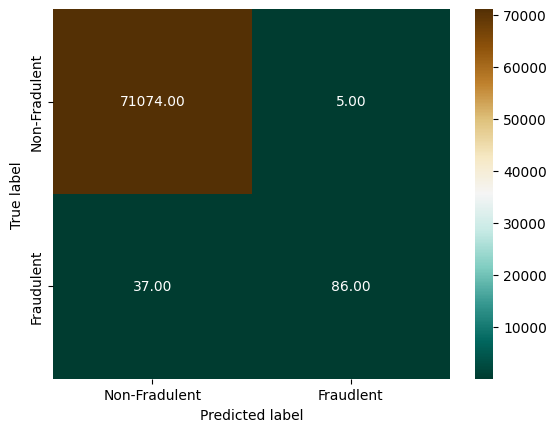

In [ ]:
sns.heatmap(cm, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
# Creating Dataframe for Evalating logistic regression model:
Evaluation_kNN=pd.DataFrame(columns=['Model Name','Accuracy','Precision', 'Recall', 'F1-Score', 'ROC AUC'])

In [ ]:
base_kNN_row= pd.Series({'Model Name': 'K-Nearest Neighbors Classifier', 'Accuracy': accuracy_knn, 'Precision': precision_knn, 'Recall': recall_knn, 'F1-Score': f1_knn, 'ROC AUC': roc_auc_knn})
Evaluation_kNN=Evaluation_kNN.append(base_kNN_row, ignore_index=True)
Evaluation_kNN

<ipython-input-201-46bed6ae775c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_kNN=Evaluation_kNN.append(base_kNN_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,K-Nearest Neighbors Classifier,0.99941,0.945055,0.699187,0.803738,0.849558


In [ ]:
# updating final evaluation dataframe
Final_Evaluation_df = Final_Evaluation_df.append(base_kNN_row, ignore_index=True)
Final_Evaluation_df

<ipython-input-202-e55b6a5f83c5>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Final_Evaluation_df = Final_Evaluation_df.append(base_kNN_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.999129,0.858824,0.593496,0.701923,0.796664
1,Decision Tree,0.999368,0.906250,0.707317,0.794521,0.853595
2,K-Nearest Neighbors Classifier,0.999410,0.945055,0.699187,0.803738,0.849558


# 4.Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# hyperparameter grid
param_grid_NB = {
    'var_smoothing': np.logspace(-9, 0, 10)
}

In [ ]:
NB_clf=GaussianNB()
cv = KFold(5,random_state=123,shuffle=True)
grid_search_NB_clf = GridSearchCV(NB_clf, param_grid_NB, cv=cv, scoring='roc_auc', n_jobs=-1)

In [ ]:
# Fitting the model:
grid_search_NB_clf.fit(X_train, y_train)
best_param = grid_search_NB_clf.best_estimator_
best_param

GaussianNB(var_smoothing=1.0)

In [ ]:
base_NB_clf=GaussianNB(var_smoothing=1.0)
# fitting the model:
base_NB_clf.fit(X_train,y_train)
y_pred_NB_clf=base_NB_clf.predict(X_test)

In [ ]:
print("Base Naive Bayesian Classification Report:")
print(classification_report(y_test, y_pred_NB_clf))

Base Naive Bayesian Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.15      0.39      0.21       123

    accuracy                           1.00     71202
   macro avg       0.57      0.69      0.61     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
accuracy_nb=base_NB_clf.score(X_test,y_test)
precision_nb, recall_nb, f1_nb, sup_nb = classification_report(y_test, y_pred_NB_clf, output_dict=True)['1'].values()
roc_auc_nb=roc_auc_score(y_test,y_pred_NB_clf)
roc_auc_nb

0.6931523118042137

**Confusion Matrix**

In [ ]:
cm = metrics.confusion_matrix( y_test,y_pred_NB_clf)
cm

array([[70799,   280],
       [   75,    48]])

Text(0.5, 23.52222222222222, 'Predicted label')

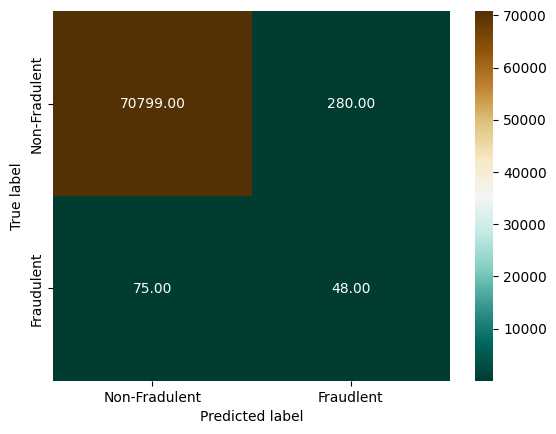

In [ ]:
sns.heatmap(cm, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

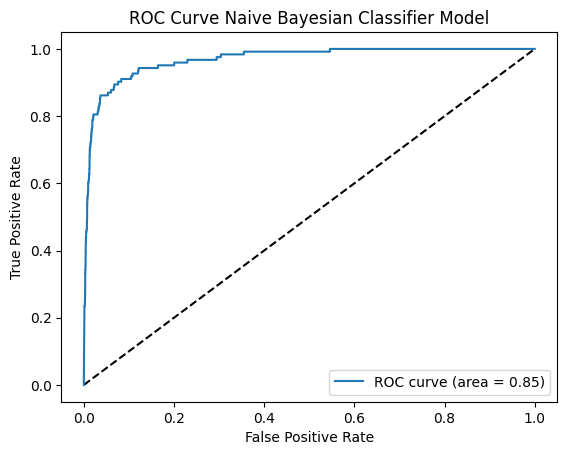

In [ ]:
# roc_auc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,base_NB_clf.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Naive Bayesian Classifier Model")
plt.legend()
plt.show()

In [ ]:
# Creating Dataframe for Evalating logistic regression model:
Evaluation_NB=pd.DataFrame(columns=['Model Name','Accuracy','Precision', 'Recall', 'F1-Score', 'ROC AUC'])


In [ ]:
base_NB_row= pd.Series({'Model Name': ' Naive Bayes Classifier', 'Accuracy': accuracy_nb, 'Precision': precision_nb, 'Recall': recall_nb, 'F1-Score': f1_nb, 'ROC AUC': roc_auc_nb})
Evaluation_NB=Evaluation_NB.append(base_NB_row, ignore_index=True)
Evaluation_NB

<ipython-input-211-85e6fbc6fbac>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_NB=Evaluation_NB.append(base_NB_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Naive Bayes Classifier,0.995014,0.146341,0.390244,0.21286,0.693152


In [ ]:
Final_Evaluation_df = Final_Evaluation_df.append(base_NB_row, ignore_index=True)
Final_Evaluation_df

<ipython-input-212-0387f9d74439>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Final_Evaluation_df = Final_Evaluation_df.append(base_NB_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.999129,0.858824,0.593496,0.701923,0.796664
1,Decision Tree,0.999368,0.906250,0.707317,0.794521,0.853595
2,K-Nearest Neighbors Classifier,0.999410,0.945055,0.699187,0.803738,0.849558
3,Naive Bayes Classifier,0.995014,0.146341,0.390244,0.212860,0.693152


# 5.Random Frorest Classifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_test.shape

(71202, 30)

In [ ]:
y_test.shape

(71202,)

In [ ]:
# creating a reduced dataframe for random forest
Non_df, reduced_df1 = train_test_split(df1, test_size=0.2, stratify=df1['Class'])
X1=reduced_df1.drop(["Class"],axis=1)
y1=reduced_df1["Class"]
X_train_r,X_test_r,y_train_r,y_test_r=train_test_split(X1,y1,stratify=y1, test_size = 0.25,random_state=123)
X_train_r=scale.fit_transform(X_train_r)
X_test_r=scale.fit_transform(X_test_r)



In [ ]:
reduced_df1.shape

(56962, 31)

In [ ]:
# hyperparmeter grid
param_grid_rf = {
    'n_estimators': [50,70, 90,110],
    'max_features': [5,6,7,8,9,10],
                     }

In [ ]:
rf_clf=RandomForestClassifier()
# cv = KFold(2)
grid_search_rf_clf = GridSearchCV(rf_clf, param_grid_rf, cv=None, scoring='roc_auc', n_jobs=-1,verbose=True)

In [ ]:
# Fitting the model:
grid_search_rf_clf.fit(X_train_r, y_train_r)
best_param = grid_search_rf_clf.best_estimator_
best_param

Fitting 5 folds for each of 24 candidates, totalling 120 fits


RandomForestClassifier(max_features=5, n_estimators=70)

In [ ]:
base_rf_clf=RandomForestClassifier(max_features=5, n_estimators=70,random_state=12)
# fitting the model:
base_rf_clf.fit(X_train_r,y_train_r)
y_pred_rf_clf=base_rf_clf.predict(X_test)

In [ ]:
print("Base Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_clf))

Base Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.87      0.67      0.76       123

    accuracy                           1.00     71202
   macro avg       0.94      0.84      0.88     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
accuracy_b_rf=base_rf_clf.score(X_test,y_test)
precision_b_rf, recall_b_rf, f1_b_rf, sup_b_rf = classification_report(y_test, y_pred_rf_clf, output_dict=True)['1'].values()
roc_auc_b_rf=roc_auc_score(y_test,y_pred_rf_clf)
roc_auc_b_rf

0.825161045473621

**Confusion Matrix**

In [ ]:
cm = metrics.confusion_matrix( y_test,y_pred_rf_clf)
cm

array([[71067,    12],
       [   40,    83]])

Text(0.5, 23.52222222222222, 'Predicted label')

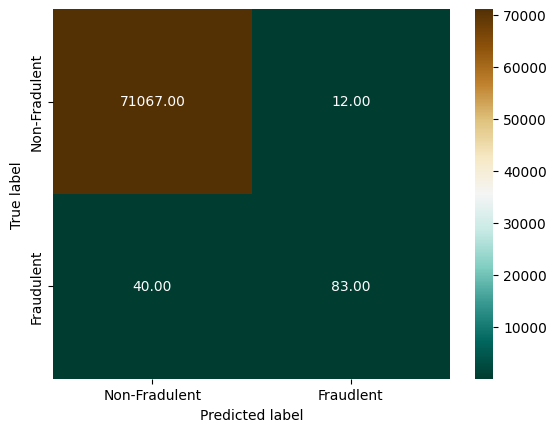

In [ ]:
sns.heatmap(cm, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

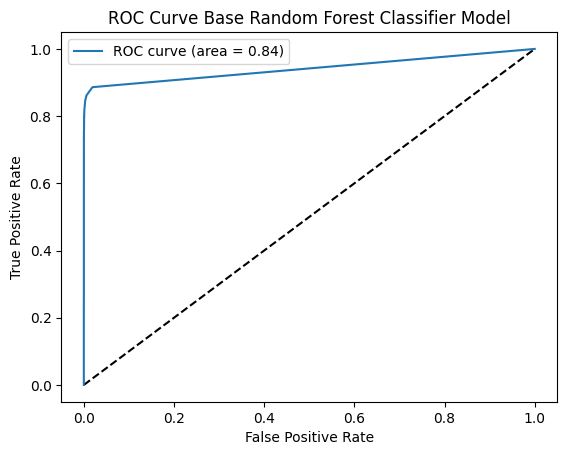

In [ ]:
# roc_auc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,base_rf_clf.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Base Random Forest Classifier Model")
plt.legend()
plt.show()

In [ ]:
# Creating Dataframe for Evalating logistic regression model:
Evaluation_RF=pd.DataFrame(columns=['Model Name','Accuracy','Precision', 'Recall', 'F1-Score', 'ROC AUC'])

In [ ]:
base_rf_row= pd.Series({'Model Name': 'Base Random Forest Classifier', 'Accuracy': accuracy_b_rf, 'Precision': precision_b_rf, 'Recall': recall_b_rf, 'F1-Score': f1_b_rf, 'ROC AUC': roc_auc_b_rf})
Evaluation_RF=Evaluation_RF.append(base_rf_row, ignore_index=True)
Evaluation_RF

<ipython-input-221-388111860ad6>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_RF=Evaluation_RF.append(base_rf_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Base Random Forest Classifier,0.999312,0.930233,0.650407,0.76555,0.825161


**2. Feature Selction using RFE**

In [ ]:
min_features_to_select = 1
cv = StratifiedKFold(5)

rfecv_rf = RFECV(
    estimator=base_rf_clf,
    step=1,
    cv=cv,
    scoring="roc_auc",
    min_features_to_select=min_features_to_select,
    n_jobs=-1,
    verbose=True
)
rfecv_rf.fit(X_train_r, y_train_r)

print(f"Optimal number of features: {rfecv_rf.n_features_}")

Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Optimal number of features: 25


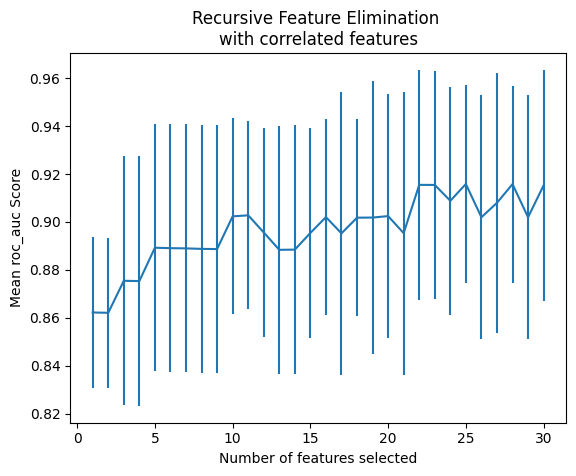

In [ ]:
n_scores = len(rfecv_rf.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean roc_auc Score")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv_rf.cv_results_["mean_test_score"],
    yerr=rfecv_rf.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [ ]:
rfecv_rf.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False,  True])

In [ ]:
# Getting Index of the most important features.
feature_indices = [index for index, value in enumerate(rfecv_rf.support_) if value==True]
print(feature_indices)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 29]


In [ ]:
rf_rfe_df=reduced_df1.iloc[:,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 29,30]]
rf_rfe_df.shape

(56962, 26)

In [ ]:
rf_rfe_df.shape

(56962, 26)

**Train-test split**

In [ ]:
X_reduced=rf_rfe_df.drop(["Class"],axis=1)
y_reduced=rf_rfe_df["Class"]
X_reduced_train,X_reduced_test,y_reduced_train,y_reduced_test=train_test_split(X_reduced,y_reduced,stratify=y_reduced, test_size = 0.25,random_state=123)
# Standarising the train test data
X_reduced_train=scale.fit_transform(X_reduced_train)
X_reduced_train=scale.fit_transform(X_reduced_train)

In [ ]:
# Fitting the model:
grid_search_rf_clf.fit(X_reduced_train, y_reduced_train)
best_param = grid_search_rf_clf.best_estimator_
best_param

Fitting 5 folds for each of 24 candidates, totalling 120 fits


RandomForestClassifier(max_features=5, n_estimators=110)

In [ ]:
rf_rfe=RandomForestClassifier(max_features=5, n_estimators=110,random_state=123)
# fitting the model:
rf_rfe.fit(X_train,y_train)
y_pred_rf_rfe=rf_rfe.predict(X_test)

In [ ]:
print("Classification Report Decision Tree Classifier with reduced feature :")
print(classification_report(y_test, y_pred_rf_rfe))

Classification Report Decision Tree Classifier with reduced feature :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.93      0.71      0.80       123

    accuracy                           1.00     71202
   macro avg       0.96      0.85      0.90     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
accuracy_r_rf=rf_rfe.score(X_test,y_test)
precision_r_rf, recall_r_rf, f1_r_rf, sup_r_rf = classification_report(y_test, y_pred_rf_rfe, output_dict=True)['1'].values()
roc_auc_r_rf=roc_auc_score(y_test,y_pred_rf_rfe)

**Confusion Matrix**

Text(0.5, 23.52222222222222, 'Predicted label')

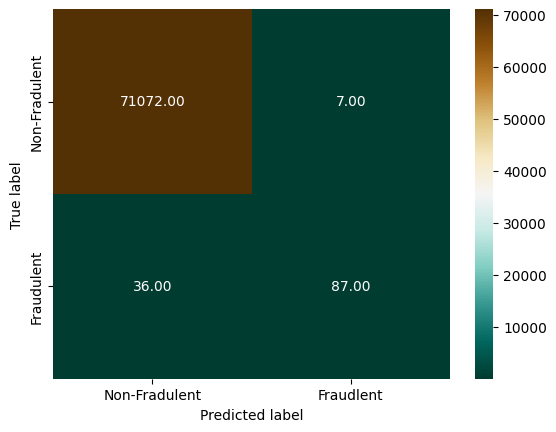

In [ ]:
cm_1= metrics.confusion_matrix( y_test,y_pred_rf_rfe)
sns.heatmap(cm_1, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

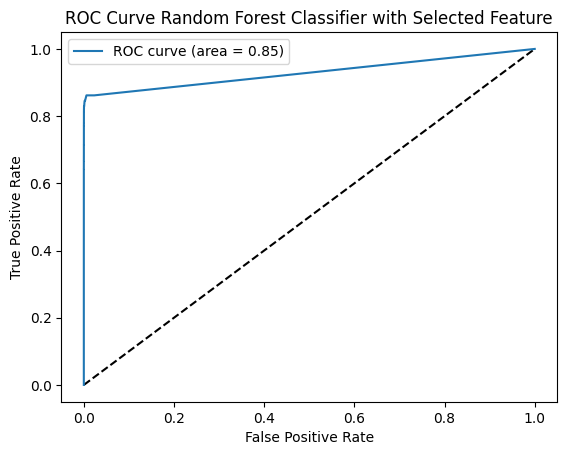

In [ ]:
# roc_auc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,rf_rfe.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Random Forest Classifier with Selected Feature")
plt.legend()
plt.show()

In [ ]:
# Updating Evaluation dataframe
rfe_rf_row= pd.Series({'Model Name': 'Reduced Random Forest Classifier', 'Accuracy': accuracy_r_rf, 'Precision': precision_r_rf, 'Recall': recall_r_rf, 'F1-Score': f1_r_rf, 'ROC AUC': roc_auc_r_rf})
Evaluation_RF=Evaluation_RF.append(rfe_rf_row, ignore_index=True)
Evaluation_RF

<ipython-input-226-8332944f85eb>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_RF=Evaluation_RF.append(rfe_rf_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Base Random Forest Classifier,0.999312,0.930233,0.650407,0.765550,0.825161
1,Reduced Random Forest Classifier,0.999396,0.925532,0.707317,0.801843,0.853609


Reason

In [ ]:
# not completed
rf_score= pd.Series({'Model Name': 'Random Forest Classifier', 'Accuracy': accuracy_r_rf, 'Precision': precision_r_rf, 'Recall': recall_r_rf, 'F1-Score': f1_r_rf, 'ROC AUC': roc_auc_r_rf})
Final_Evaluation_df = Final_Evaluation_df.append(rf_score, ignore_index=True)
Final_Evaluation_df

<ipython-input-227-35e1a41d9b12>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Final_Evaluation_df = Final_Evaluation_df.append(rf_score, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.999129,0.858824,0.593496,0.701923,0.796664
1,Decision Tree,0.999368,0.906250,0.707317,0.794521,0.853595
2,K-Nearest Neighbors Classifier,0.999410,0.945055,0.699187,0.803738,0.849558
3,Naive Bayes Classifier,0.995014,0.146341,0.390244,0.212860,0.693152
4,Random Forest Classifier,0.999396,0.925532,0.707317,0.801843,0.853609


# 6.Adaptive Boost:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
param_grid_adaboost = {'n_estimators': [100, 200,250,300,350,400],
                      'learning_rate': [10 ** x for x in range(-3, 1)]}

In [ ]:
ab_clf=AdaBoostClassifier()
cv = KFold(5,random_state=123,shuffle=True)
grid_search_ab_clf = GridSearchCV(ab_clf, param_grid_adaboost, cv=cv, scoring='roc_auc', n_jobs=-1,verbose=True)

In [ ]:
# Fitting the model:
grid_search_ab_clf.fit(X_train_r, y_train_r)
best_param = grid_search_ab_clf.best_estimator_
best_param

AdaBoostClassifier(learning_rate=0.1, n_estimators=350)

In [ ]:
base_ab_clf=AdaBoostClassifier(learning_rate=0.1, n_estimators=350,random_state=123)
# fitting the model:
base_ab_clf.fit(X_train_r,y_train_r)
y_pred_ab_clf=base_ab_clf.predict(X_test)

In [ ]:
print("Base Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_ab_clf))

Base Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.65      0.77       123

    accuracy                           1.00     71202
   macro avg       0.98      0.83      0.89     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
accuracy_b_ad=base_ab_clf.score(X_test,y_test)
precision_b_ad, recall_b_ad, f1_b_ad, sup_b_ad = classification_report(y_test, y_pred_ab_clf, output_dict=True)['1'].values()
roc_auc_b_ad=roc_auc_score(y_test,y_pred_ab_clf)
roc_auc_b_ad

0.8251751143265875

**Confusion Matrix**

In [ ]:
cm = metrics.confusion_matrix( y_test,y_pred_ab_clf)
cm

array([[71062,    17],
       [   38,    85]])

Text(0.5, 23.52222222222222, 'Predicted label')

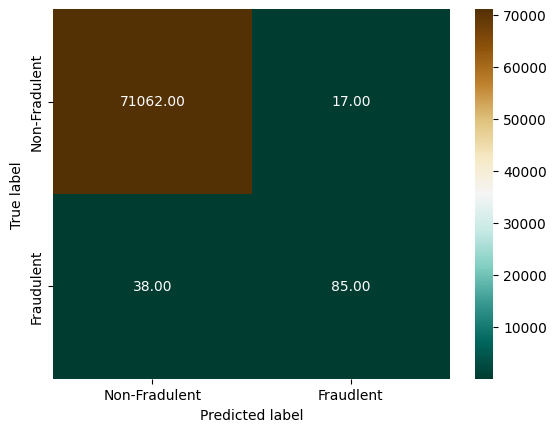

In [ ]:
sns.heatmap(cm, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

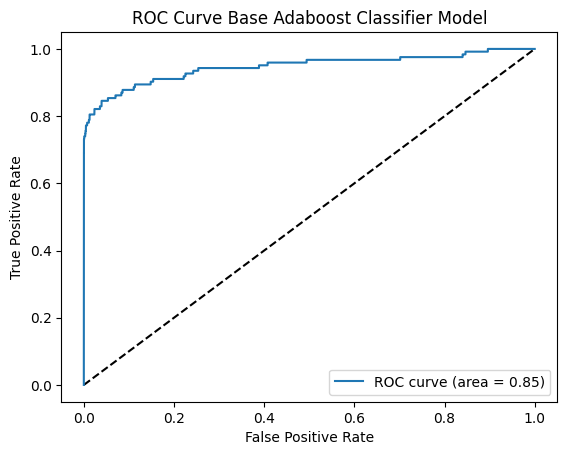

In [ ]:
# roc_auc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,base_ab_clf.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Base Adaboost Classifier Model")
plt.legend()
plt.show()

In [ ]:
# Creating Dataframe for Evalating logistic regression model:
Evaluation_AB=pd.DataFrame(columns=['Model Name','Accuracy','Precision', 'Recall', 'F1-Score', 'ROC AUC'])

In [ ]:
base_ab_row= pd.Series({'Model Name': 'Base Adaboost Classifier', 'Accuracy': accuracy_b_ad, 'Precision': precision_b_ad, 'Recall': recall_b_ad, 'F1-Score': f1_b_ad, 'ROC AUC': roc_auc_b_ad})
Evaluation_AB=Evaluation_AB.append(base_ab_row, ignore_index=True)
Evaluation_AB

<ipython-input-233-85c704e1f77c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_AB=Evaluation_AB.append(base_ab_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Base Adaboost Classifier,0.99934,0.952381,0.650407,0.772947,0.825175


**2. Feature Selction using RFE**

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
rfe_ab = RFE(estimator=base_ab_clf, n_features_to_select=10, step=1,verbose=True)

In [ ]:
min_features_to_select = 1
cv = StratifiedKFold(5)

rfecv_ab = RFECV(
    estimator=base_ab_clf,
    step=1,
    cv=cv,
    scoring="roc_auc",
    min_features_to_select=min_features_to_select,
    n_jobs=-1,
)
rfecv_ab.fit(X_train_r, y_train_r)

print(f"Optimal number of features: {rfecv_ab.n_features_}")

Optimal number of features: 27


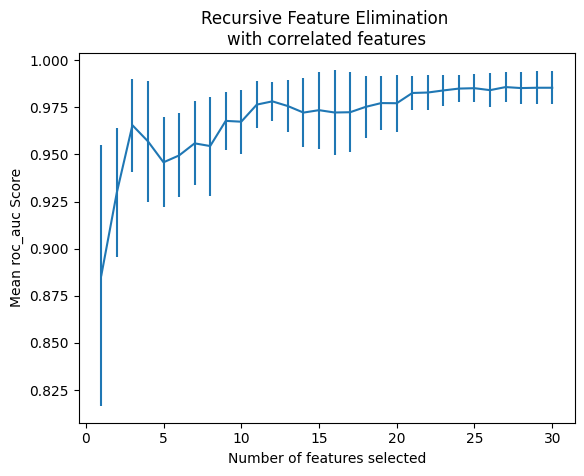

In [ ]:
n_scores = len(rfecv_ab.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean roc_auc Score")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv_ab.cv_results_["mean_test_score"],
    yerr=rfecv_ab.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [ ]:
rfecv_ab.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True])

In [ ]:
# Getting Index of the most important features.
feature_indices = [index for index, value in enumerate(rfecv_ab.support_) if value==True]
print(feature_indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29]


In [ ]:
ab_rfe_df=df1.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29,30]]
ab_rfe_df.shape

(284807, 28)

**Train-test split**

In [ ]:
X_reduced=ab_rfe_df.drop(["Class"],axis=1)
y_reduced=ab_rfe_df["Class"]
X_reduced_train,X_reduced_test,y_reduced_train,y_reduced_test=train_test_split(X_reduced,y_reduced,stratify=y_reduced, test_size = 0.25,random_state=123)
# Standarising the train test data
X_reduced_train=scale.fit_transform(X_reduced_train)
X_reduced_train=scale.fit_transform(X_reduced_train)

In [ ]:
X_reduced.shape

(284807, 27)

In [ ]:
ab_rfe=AdaBoostClassifier(learning_rate=0.1, n_estimators=350,random_state=123)
# fitting the model:
ab_rfe.fit(X_reduced_train,y_reduced_train)
y_pred_ab_rfe=ab_rfe.predict(X_reduced_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [ ]:
print("Classification Report Decision Tree Classifier with reduced feature :")
print(classification_report(y_reduced_test, y_pred_ab_rfe))

Classification Report Decision Tree Classifier with reduced feature :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.83      0.66      0.73       123

    accuracy                           1.00     71202
   macro avg       0.91      0.83      0.87     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
accuracy_r_ab=ab_rfe.score(X_reduced_train,y_reduced_train)
precision_r_ab, recall_r_ab, f1_r_ab, sup_r_ab = classification_report(y_reduced_test, y_pred_ab_rfe, output_dict=True)['1'].values()
roc_auc_r_ab=roc_auc_score(y_reduced_test,y_pred_ab_rfe)

**Confusion Matrix**

Text(0.5, 23.52222222222222, 'Predicted label')

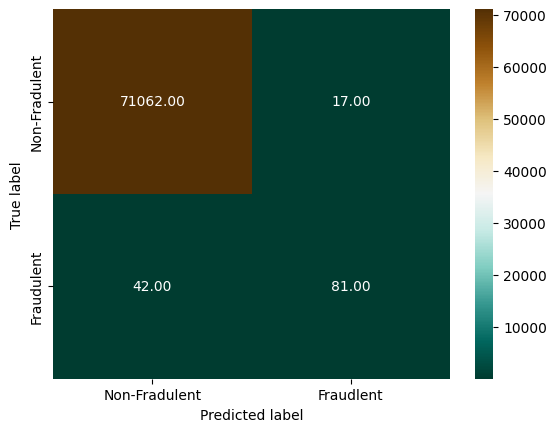

In [ ]:
cm_1= metrics.confusion_matrix( y_reduced_test,y_pred_ab_rfe)
sns.heatmap(cm_1, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


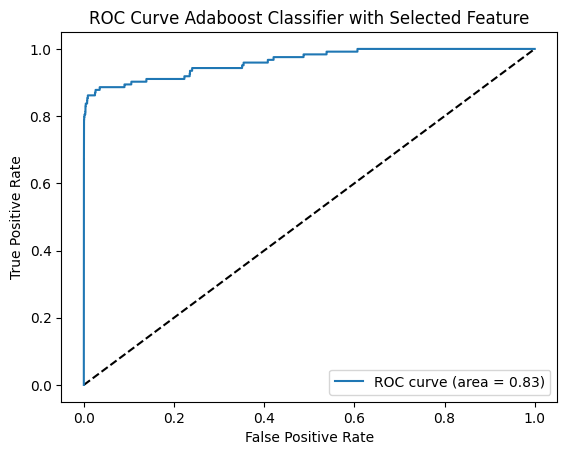

In [ ]:
# roc_auc curve
fpr, tpr, thresholds = metrics.roc_curve(y_reduced_test, ab_rfe.predict_proba(X_reduced_test)[:,1])
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Adaboost Classifier with Selected Feature")
plt.legend()
plt.show()

In [ ]:
# Updating Evaluation dataframe
rfe_ab_row= pd.Series({'Model Name': 'Reduced Adaboost Classifier', 'Accuracy': accuracy_r_ab, 'Precision': precision_r_ab, 'Recall': recall_r_ab, 'F1-Score': f1_r_ab, 'ROC AUC': roc_auc_r_ab})
Evaluation_AB=Evaluation_AB.append(rfe_ab_row, ignore_index=True)
Evaluation_AB

<ipython-input-239-c30eac8f9bce>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_AB=Evaluation_AB.append(rfe_ab_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Base Adaboost Classifier,0.999340,0.952381,0.650407,0.772947,0.825175
1,Reduced Adaboost Classifier,0.999307,0.826531,0.658537,0.733032,0.829149


In [ ]:
# not completed
adb_score= pd.Series({'Model Name': 'AdaBoost', 'Accuracy': accuracy_r_ab, 'Precision': precision_r_ab, 'Recall': recall_r_ab, 'F1-Score': f1_r_ab, 'ROC AUC': roc_auc_r_ab})
Final_Evaluation_df = Final_Evaluation_df.append(adb_score, ignore_index=True)
Final_Evaluation_df

<ipython-input-240-e6da8f023c89>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Final_Evaluation_df = Final_Evaluation_df.append(adb_score, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.999129,0.858824,0.593496,0.701923,0.796664
1,Decision Tree,0.999368,0.906250,0.707317,0.794521,0.853595
2,K-Nearest Neighbors Classifier,0.999410,0.945055,0.699187,0.803738,0.849558
3,Naive Bayes Classifier,0.995014,0.146341,0.390244,0.212860,0.693152
4,Random Forest Classifier,0.999396,0.925532,0.707317,0.801843,0.853609
5,AdaBoost,0.999307,0.826531,0.658537,0.733032,0.829149


# 7.Support Vector Machine Classifier:

In [ ]:
from sklearn.svm import SVC

In [ ]:
# hyperparameter grid
param_grid_scv = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.1, 1],

                }

In [ ]:
svc_clf=SVC(class_weight='balanced',kernel='linear')
cv = KFold(5)
grid_search_svc_clf = GridSearchCV(svc_clf, param_grid_scv, cv=cv, scoring='roc_auc', n_jobs=-1,verbose=True)

In [ ]:
# Fitting the model:
grid_search_svc_clf.fit(X_train_r, y_train_r)
best_param = grid_search_svc_clf.best_estimator_
best_param

Fitting 5 folds for each of 9 candidates, totalling 45 fits


SVC(C=0.1, class_weight='balanced', gamma=0.001, kernel='linear')

In [ ]:
base_svc_clf=SVC(C=0.1,class_weight='balanced', gamma=0.001, kernel='linear',verbose=True)
# fitting the model:
base_svc_clf.fit(X_train,y_train)
y_pred_svc_clf=base_svc_clf.predict(X_test)

[LibSVM]

In [ ]:
print("Base Support Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svc_clf))

Base Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.07      0.87      0.13       123

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.56     71202
weighted avg       1.00      0.98      0.99     71202



In [ ]:
accuracy_b_svc=base_svc_clf.score(X_test,y_test)
precision_b_svc, recall_b_svc, f1_b_svc, sup_b_svc = classification_report(y_test, y_pred_svc_clf, output_dict=True)['1'].values()
roc_auc_b_svc=roc_auc_score(y_test,y_pred_svc_clf)
roc_auc_b_svc

0.9251674279288692

**Confusion Matrix**

In [ ]:
cm = metrics.confusion_matrix( y_test,y_pred_svc_clf)
cm

array([[69687,  1392],
       [   16,   107]])

Text(0.5, 23.52222222222222, 'Predicted label')

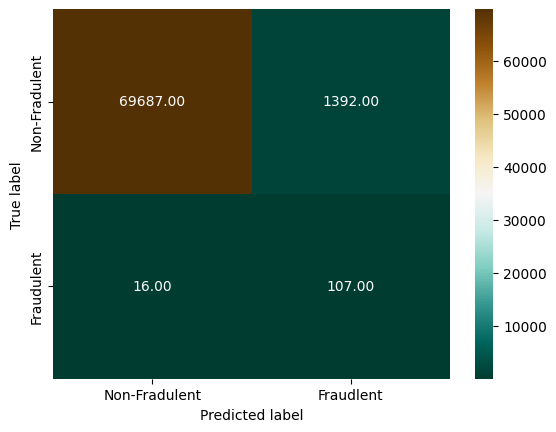

In [ ]:
sns.heatmap(cm, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

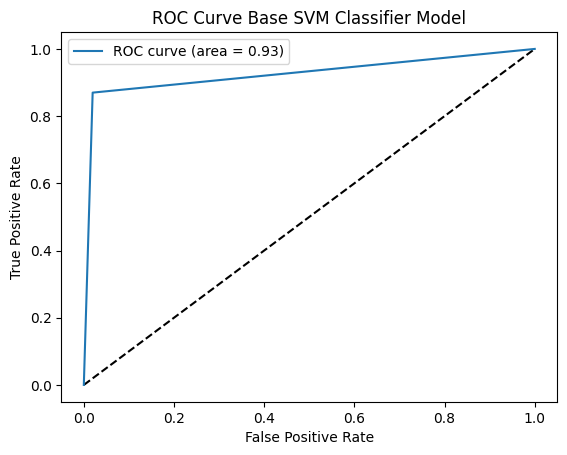

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_svc_clf)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Base SVM Classifier Model")
plt.legend()
plt.show()

In [ ]:
# Creating Dataframe for Evalating logistic regression model:
Evaluation_SVC=pd.DataFrame(columns=['Model Name','Accuracy','Precision', 'Recall', 'F1-Score', 'ROC AUC'])

In [ ]:
base_svc_row= pd.Series({'Model Name': ' Base Support Vector Machine Classifier', 'Accuracy': accuracy_b_svc, 'Precision': precision_b_svc, 'Recall': recall_b_svc, 'F1-Score': f1_b_svc, 'ROC AUC': roc_auc_b_svc})
Evaluation_SVC=Evaluation_SVC.append(base_svc_row, ignore_index=True)
Evaluation_SVC

<ipython-input-245-11528e7a24f8>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_SVC=Evaluation_SVC.append(base_svc_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Base Support Vector Machine Classifier,0.980225,0.071381,0.869919,0.131936,0.925167


**2. Feature Selction using RFE**

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [ ]:
rfe_svc = RFE(estimator=base_svc_clf, n_features_to_select=10, step=1,verbose=True)

In [ ]:
rfe_svc.fit(X_train, y_train)

Fitting estimator with 30 features.
[LibSVM]Fitting estimator with 29 features.
[LibSVM]Fitting estimator with 28 features.
[LibSVM]Fitting estimator with 27 features.
[LibSVM]Fitting estimator with 26 features.
[LibSVM]Fitting estimator with 25 features.
[LibSVM]Fitting estimator with 24 features.
[LibSVM]Fitting estimator with 23 features.
[LibSVM]Fitting estimator with 22 features.
[LibSVM]Fitting estimator with 21 features.
[LibSVM]Fitting estimator with 20 features.
[LibSVM]Fitting estimator with 19 features.
[LibSVM]Fitting estimator with 18 features.
[LibSVM]Fitting estimator with 17 features.
[LibSVM]Fitting estimator with 16 features.
[LibSVM]Fitting estimator with 15 features.
[LibSVM]Fitting estimator with 14 features.
[LibSVM]Fitting estimator with 13 features.
[LibSVM]Fitting estimator with 12 features.
[LibSVM]Fitting estimator with 11 features.
[LibSVM][LibSVM]

RFE(estimator=SVC(C=0.1, class_weight='balanced', gamma=0.001, kernel='linear',
                  verbose=True),
    n_features_to_select=10, verbose=True)

In [ ]:
print(f"Optimal number of features: {rfe_svc.n_features_}")

Optimal number of features: 10


In [ ]:
rfe_svc.support_

array([False, False, False, False,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False])

In [ ]:
# Getting Index of the most important features.
feature_indices = [index for index, value in enumerate(rfe_svc.support_) if value==True]
print(feature_indices)

[4, 9, 10, 11, 12, 13, 14, 16, 22, 26]


In [ ]:
svc_rfe_df=reduced_df1.iloc[:,[4, 9, 10, 11, 12, 13, 14, 16, 22, 26,30]]
svc_rfe_df.head()

,V3,V8,V9,V10,V11,V12,V13,V15,V21,V25,Class
146448,-1.525461,-0.237110,0.457064,0.042633,-1.290571,0.581687,1.029306,0.050096,-0.334549,-0.152323,0
108846,1.428059,0.514895,-1.018514,-0.108394,1.266769,0.130063,-1.076509,1.150080,-0.057151,-0.586297,0
6238,0.953609,-0.047816,2.233460,-0.704324,0.098806,-2.713539,1.734466,1.052653,0.133603,-0.059172,0
116112,1.347560,-0.128828,-2.665151,0.445616,-0.344167,-0.975803,0.669541,0.229764,-0.150755,0.415820,0
112500,0.307581,-0.214394,0.003942,-0.288357,-0.038354,0.334717,0.417736,1.073425,-0.285646,0.223198,0


**Train-test split**

In [ ]:
X_reduced=svc_rfe_df.drop(["Class"],axis=1)
y_reduced=svc_rfe_df["Class"]
X_reduced_train,X_reduced_test,y_reduced_train,y_reduced_test=train_test_split(X_reduced,y_reduced,stratify=y_reduced, test_size = 0.25,random_state=123)

In [ ]:
param_scv = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.1, 1],

                }

In [ ]:
# Hyperparameter tunning.
random_search_svc_clf = RandomizedSearchCV(svc_clf, param_distributions=param_scv, n_iter=50, scoring='roc_auc',cv=5, random_state=123,verbose=True)


In [ ]:
# Fitting the model:
random_search_svc_clf.fit(X_reduced_train, y_reduced_train)
best_param = random_search_svc_clf.best_estimator_
best_param

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits


SVC(C=10, class_weight='balanced', gamma=0.001, kernel='linear')

In [ ]:
svc_rfe=SVC(C=10, class_weight='balanced', gamma=0.001, kernel='linear',verbose=True)
# fitting the model:
svc_rfe.fit(X_train_r,y_train_r)
y_pred_svc_rfe=svc_rfe.predict(X_test)

[LibSVM]

In [ ]:
print("Classification Report Decision Tree Classifier with reduced feature :")
print(classification_report(y_test, y_pred_svc_rfe))

Classification Report Decision Tree Classifier with reduced feature :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.05      0.83      0.10       123

    accuracy                           0.98     71202
   macro avg       0.53      0.90      0.55     71202
weighted avg       1.00      0.98      0.99     71202



In [ ]:
accuracy_r_svc=svc_rfe.score(X_test,y_test)
precision_r_svc, recall_r_svc, f1_r_svc, sup_r_svc = classification_report(y_test, y_pred_svc_rfe, output_dict=True)['1'].values()
roc_auc_r_svc=roc_auc_score(y_test,y_pred_svc_rfe)

**Confusion Matrix**

Text(0.5, 23.52222222222222, 'Predicted label')

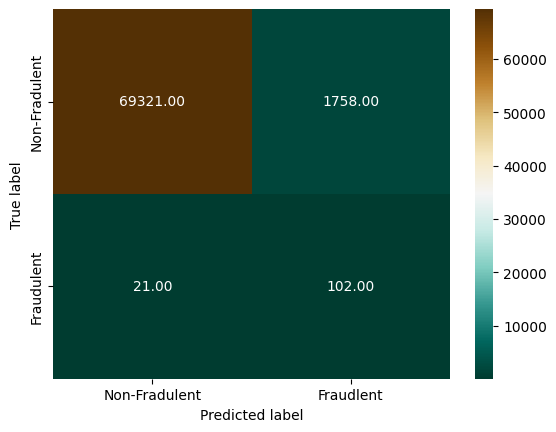

In [ ]:
cm_1= metrics.confusion_matrix( y_test,y_pred_svc_rfe)
sns.heatmap(cm_1, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

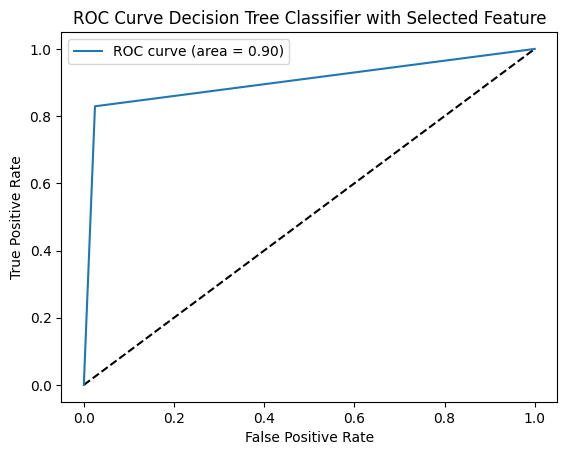

In [ ]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, svc_rfe.predict_proba(X_reduced_test)[:,1])
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Suppor vector machine classifier")
plt.legend()
plt.show()

In [ ]:
# Updating Evaluation dataframe
rfe_svc_row= pd.Series({'Model Name': 'Reduced SVM Classifier', 'Accuracy': accuracy_r_svc, 'Precision': precision_r_svc, 'Recall': recall_r_svc, 'F1-Score': f1_r_svc, 'ROC AUC': roc_auc_r_svc})
Evaluation_SVC=Evaluation_SVC.append(rfe_svc_row, ignore_index=True)
Evaluation_SVC

<ipython-input-256-be411963f136>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_SVC=Evaluation_SVC.append(rfe_svc_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Base Support Vector Machine Classifier,0.980225,0.071381,0.869919,0.131936,0.925167
1,Reduced SVM Classifier,0.967908,0.046560,0.902439,0.088552,0.935230


In [ ]:
# Updating Final Evaluation dataframe with
svc_score= pd.Series({'Model Name': 'Support Vector Machine Classifier', 'Accuracy': accuracy_b_svc,'Precision': precision_b_svc, 'Recall': recall_b_svc, 'F1-Score': f1_b_svc, 'ROC AUC': roc_auc_b_svc})
Final_Evaluation_df = Final_Evaluation_df.append(svc_score, ignore_index=True)
Final_Evaluation_df

<ipython-input-257-e463f1ce0ae2>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Final_Evaluation_df = Final_Evaluation_df.append(svc_score, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.999129,0.858824,0.593496,0.701923,0.796664
1,Decision Tree,0.999368,0.906250,0.707317,0.794521,0.853595
2,K-Nearest Neighbors Classifier,0.999410,0.945055,0.699187,0.803738,0.849558
3,Naive Bayes Classifier,0.995014,0.146341,0.390244,0.212860,0.693152
4,Random Forest Classifier,0.999396,0.925532,0.707317,0.801843,0.853609
5,AdaBoost,0.999307,0.826531,0.658537,0.733032,0.829149
6,Support Vector Machine Classifier,0.980225,0.071381,0.869919,0.131936,0.925167


# 8.Artificial Neural Network:

In [ ]:
# importing Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn import metrics

In [ ]:
# creating a sequential NN
model = Sequential()
model.add(Dense(32, input_shape=(30,), activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(16, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(8, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer_ = tf.keras.optimizers.Adam(learning_rate=0.001)
# compiling the model
model.compile(optimizer=optimizer_, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
# Intiallising early stopper for termination of NN
early_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1,mode='auto', baseline=None, restore_best_weights=False)


In [ ]:
# fitting the model
hist_ = model.fit(X_train,y_train, epochs = 6, batch_size=5, validation_split = 0.15, verbose = True,
                    callbacks = [early_stopper])
hist_dict = hist_.history

Epoch 1/6
36313/36313 [==============================] - 113s 3ms/step - loss: 0.0151 - accuracy: 0.9984 - val_loss: 0.0033 - val_accuracy: 0.9996
Epoch 2/6
36313/36313 [==============================] - 94s 3ms/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0034 - val_accuracy: 0.9996
Epoch 3/6
36313/36313 [==============================] - 94s 3ms/step - loss: 0.0064 - accuracy: 0.9990 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 4/6
36313/36313 [==============================] - 93s 3ms/step - loss: 0.0057 - accuracy: 0.9991 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 5/6
36313/36313 [==============================] - 95s 3ms/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.0048 - val_accuracy: 0.9995
Epoch 6/6
36313/36313 [==============================] - 86s 2ms/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9995


Text(0.5, 0, 'Epochs')

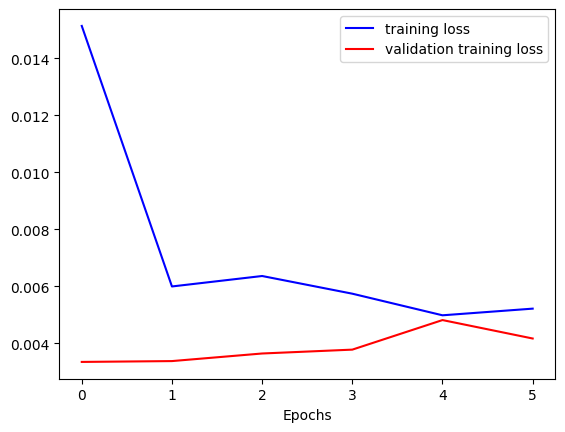

In [ ]:
# loss function plot
loss_val = hist_dict['loss']
val_loss_val=hist_dict['val_loss']
plt.plot(loss_val,'b',label='training loss')
plt.plot(val_loss_val,'r',label='validation training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

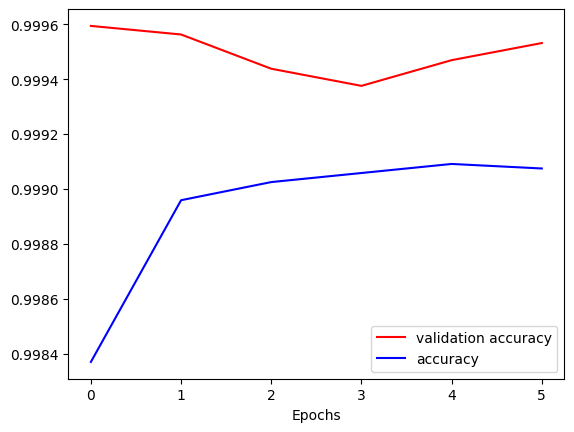

In [ ]:
# accuracy plots
accuracy_val = hist_dict['accuracy']
val_accuracy_val=hist_dict['val_accuracy']
plt.plot(val_accuracy_val,'-r',label='validation accuracy')
plt.plot(accuracy_val,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

In [ ]:
# model prediction probability
model.predict(X_test)

2226/2226 [==============================] - 3s 1ms/step


array([[5.2135900e-05],
       [7.1529976e-05],
       [7.1705053e-08],
       ...,
       [3.8164767e-06],
       [4.0530534e-09],
       [1.8805565e-06]], dtype=float32)

In [ ]:
y_pred_=model.predict(X_test)
y_pred_nn= np.where(y_pred_ > 0.5, 1,0)

2226/2226 [==============================] - 4s 2ms/step


In [ ]:
#scores
accuracy_ann=metrics.accuracy_score(y_test, y_pred_nn)
precision_ann=metrics.precision_score(y_test, y_pred_nn)
recall_ann=metrics.recall_score(y_test, y_pred_nn)
f1_ann=metrics.f1_score(y_test, y_pred_nn)

Accuracy Neural Net: 0.9992275497879273
Precision Neural Net: 0.8953488372093024
Recall Neural Net: 0.6260162601626016
F1 Score Neural Net: 0.7368421052631579


Text(0.5, 23.52222222222222, 'Predicted label')

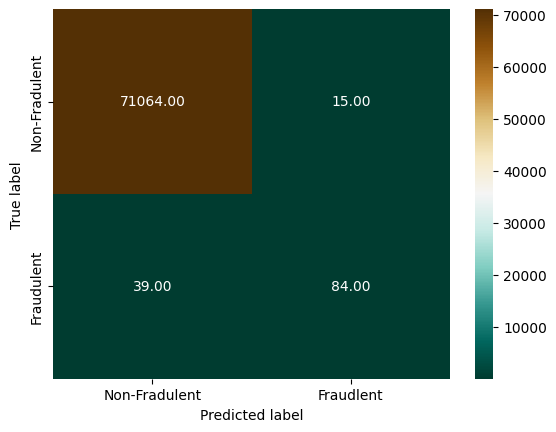

In [ ]:
cm = metrics.confusion_matrix( y_test,y_pred_nn)
sns.heatmap(cm, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
#AUC_ROC
y_pred_nn_proba = model.predict(X_test)
fpr_ann, tpr_ann, thresholds_ann = metrics.roc_curve(y_test,y_pred_nn_proba)
auc_ann = auc(fpr_ann, tpr_ann)


2226/2226 [==============================] - 5s 2ms/step


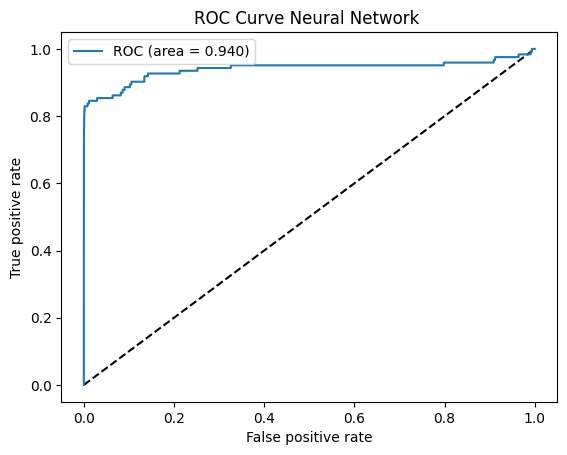

In [ ]:
#ROC
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_ann, tpr_ann, label='ROC (area = {:.3f})'.format(auc_ann))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve Neural Network ')
plt.legend(loc='best')
plt.show()

In [ ]:
# updating final ebaluation dataset
svc_score= pd.Series({'Model Name': 'Artificial Neural Network', 'Accuracy': accuracy_ann,'Precision': precision_ann, 'Recall': recall_ann, 'F1-Score': f1_ann, 'ROC AUC': auc_ann})
Final_Evaluation_df = Final_Evaluation_df.append(svc_score, ignore_index=True)
Final_Evaluation_df

<ipython-input-269-0cd9abcb3207>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Final_Evaluation_df = Final_Evaluation_df.append(svc_score, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.999129,0.858824,0.593496,0.701923,0.796664
1,Decision Tree,0.999368,0.906250,0.707317,0.794521,0.853595
2,K-Nearest Neighbors Classifier,0.999410,0.945055,0.699187,0.803738,0.849558
3,Naive Bayes Classifier,0.995014,0.146341,0.390244,0.212860,0.693152
4,Random Forest Classifier,0.999396,0.925532,0.707317,0.801843,0.853609
5,AdaBoost,0.999307,0.826531,0.658537,0.733032,0.829149
6,Support Vector Machine Classifier,0.980225,0.071381,0.869919,0.131936,0.925167
7,Artificial Neural Network,0.999228,0.895349,0.626016,0.736842,0.945601


# Reasampling Techniques:

In [ ]:
#importing libraries
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

In [ ]:
# train-test split and
X=df1.drop(["Class"],axis=1)
y=df1["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, test_size = 0.25,random_state=123)
scale = RobustScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

In [ ]:
rs_under = RandomUnderSampler(random_state=42,sampling_strategy='auto')
X_train_un, y_train_un = rs_under.fit_resample(X_train,y_train)

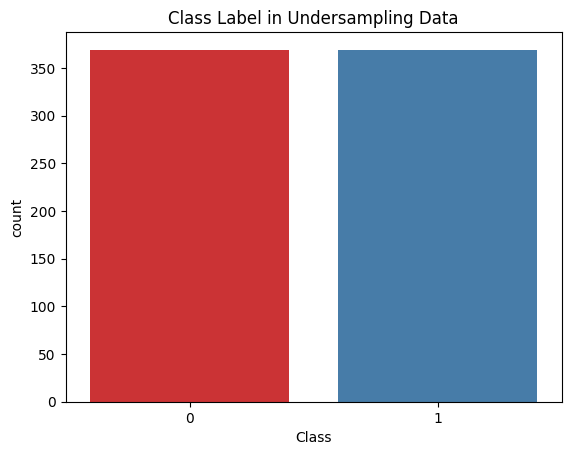

In [ ]:
sns.countplot(x =y_train_un , palette = "Set1")
plt.title('Class Label in Undersampling Data')
plt.show()

In [ ]:
rs_over = RandomOverSampler(random_state=123,sampling_strategy='auto')
X_train_ov, y_train_ov = rs_over.fit_resample(X_train,y_train)

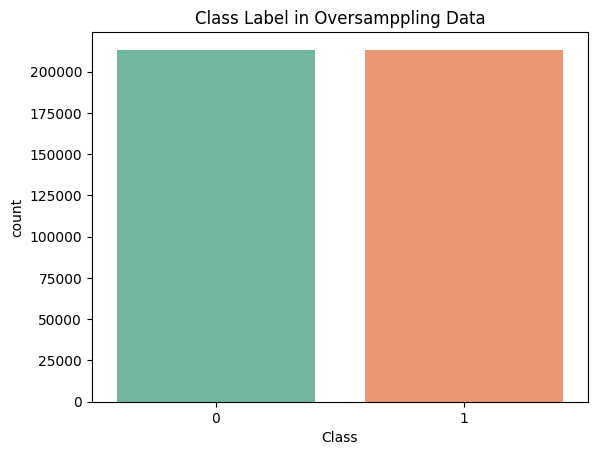

In [ ]:
sns.countplot(x =y_train_ov , palette = "Set2")
plt.title('Class Label in Oversamppling Data')
plt.show()

In [ ]:
X_test.shape

(71202, 30)

In [ ]:
smote = SMOTE(random_state=123,sampling_strategy='auto')
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

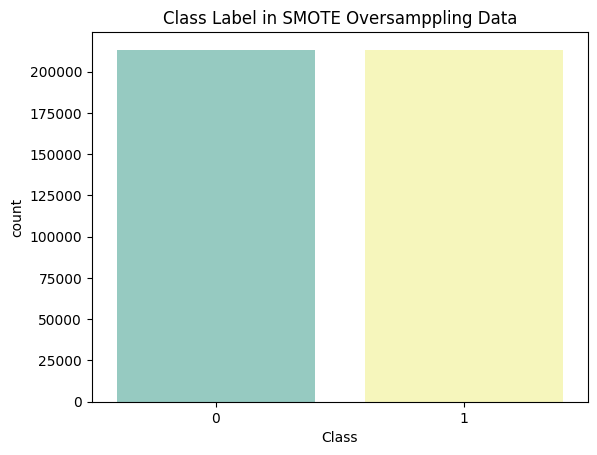

In [ ]:
sns.countplot(x =y_train_sm , palette = "Set3")
plt.title('Class Label in SMOTE Oversamppling Data')
plt.show()

#1.Decision Tree


In [ ]:
param_decision = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# intiallizing a decison tree calssifier:
dt_clf=DecisionTreeClassifier()

In [ ]:
cv = KFold(5,random_state=123,shuffle=True)
# Hyperparameter tunning with GridSearchCV.
grid_search_dt_clf = GridSearchCV(dt_clf, param_decision, cv=cv, scoring='roc_auc', n_jobs=-1)

In [ ]:
# Hyperparameter tunning with RandomSeachCV.
random_search_dt_clf = RandomizedSearchCV(dt_clf, param_distributions=param_decision, n_iter=50, scoring='roc_auc',cv=2, random_state=123,verbose=True)


1. Random Undersampling

In [ ]:
# Fitting the model:
grid_search_dt_clf.fit(X_train_un, y_train_un)
best_param = grid_search_dt_clf.best_estimator_
best_param

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5)

In [ ]:
# building Decison tree Model:
dt_clf_un=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,min_samples_split=10,random_state=123)
# fitting the model:
dt_clf_un.fit(X_train_un, y_train_un)
y_pred_dt_un=dt_clf_un.predict(X_test)

In [ ]:
# Calculating evaluation metrics for the model
accuracy_dt_und=dt_clf_un.score(X_test,y_test)
precision_dt_und, recall_dt_und, f1_dt_und, sup_dt_und = classification_report(y_test, y_pred_dt_un, output_dict=True)['1'].values()
roc_auc_dt_und=roc_auc_score(y_test,y_pred_dt_un)
roc_auc_dt_und

0.8868078424590433

Confusion Matrix

In [ ]:
cm = metrics.confusion_matrix( y_test,y_pred_dt_un)
cm

array([[63656,  7423],
       [   15,   108]])

Text(0.5, 23.52222222222222, 'Predicted label')

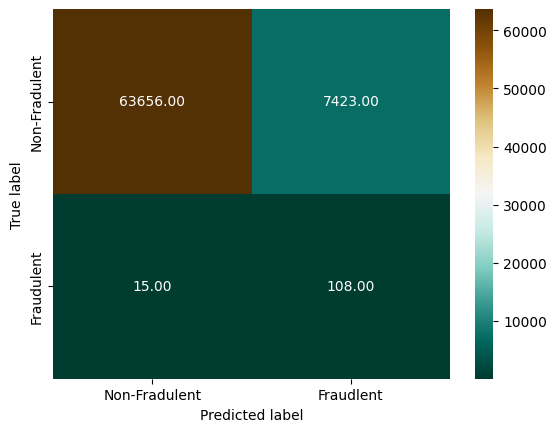

In [ ]:
sns.heatmap(cm, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
# Creating Dataframe for Evalating logistic regression model:
Evaluation_DT_sam=pd.DataFrame(columns=['Model Name','Accuracy','Precision', 'Recall', 'F1-Score', 'ROC AUC'])

In [ ]:
# adding Logistic regression results without sampling
Evaluation_DT_sam=Evaluation_DT_sam.append(base_dt_row, ignore_index=True)


<ipython-input-42-0490f26817cb>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_DT_sam=Evaluation_DT_sam.append(base_dt_row, ignore_index=True)


In [ ]:
un_dt_row= pd.Series({'Model Name': 'Decision Tree Classifier with Undersampling', 'Accuracy': accuracy_dt_und, 'Precision': precision_dt_und, 'Recall': recall_dt_und, 'F1-Score': f1_dt_und, 'ROC AUC': roc_auc_dt_und})
Evaluation_DT_sam=Evaluation_DT_sam.append(un_dt_row, ignore_index=True)
Evaluation_DT_sam

<ipython-input-43-0eed8c443214>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_DT_sam=Evaluation_DT_sam.append(un_dt_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Base Decision Tree Classifier,0.999368,0.906250,0.707317,0.794521,0.853595
1,Decision Tree Classifier with Undersampling,0.895537,0.014341,0.878049,0.028221,0.886808


2.Random Oversampling:

In [ ]:
# Hyperparameter Tunning with random search cv
random_search_dt_clf.fit(X_train_ov, y_train_ov)
best_param = random_search_dt_clf.best_estimator_
best_param

Fitting 2 folds for each of 50 candidates, totalling 100 fits


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4,
                       min_samples_split=10)

In [ ]:
# building Decison tree Model:
dt_clf_ov=DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4,min_samples_split=10)
# fitting the model:
dt_clf_ov.fit(X_train_ov, y_train_ov)
y_pred_dt_ov=dt_clf_ov.predict(X_test)

In [ ]:
print("Base Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt_ov))

Base Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.74      0.72      0.73       123

    accuracy                           1.00     71202
   macro avg       0.87      0.86      0.86     71202
weighted avg       1.00      1.00      1.00     71202



Confusion Matrix

In [ ]:
cm = metrics.confusion_matrix( y_test,y_pred_dt_ov)
cm

array([[71047,    32],
       [   34,    89]])

Text(0.5, 23.52222222222222, 'Predicted label')

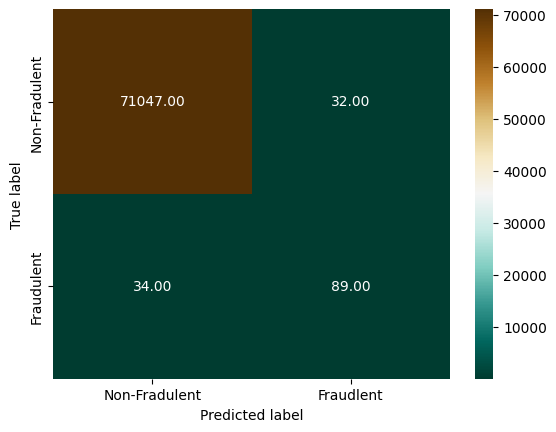

In [ ]:
sns.heatmap(cm, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
accuracy_dt_ov=dt_clf_un.score(X_test,y_test)
precision_dt_ov, recall_dt_ov, f1_dt_ov, sup_dt_ov = classification_report(y_test, y_pred_dt_ov, output_dict=True)['1'].values()
roc_auc_dt_ov=roc_auc_score(y_test,y_pred_dt_ov)
roc_auc_dt_ov

0.8615846195181659

In [ ]:
ov_dt_row= pd.Series({'Model Name': 'Decision Tree Classifier with Oversampling', 'Accuracy': accuracy_dt_ov, 'Precision': precision_dt_ov, 'Recall': recall_dt_ov, 'F1-Score': f1_dt_ov, 'ROC AUC': roc_auc_dt_ov})
Evaluation_DT_sam=Evaluation_DT_sam.append(ov_dt_row, ignore_index=True)

<ipython-input-46-cf77274a7231>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_DT_sam=Evaluation_DT_sam.append(ov_dt_row, ignore_index=True)


In [ ]:
Evaluation_DT_sam

,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Base Decision Tree Classifier,0.999368,0.906250,0.707317,0.794521,0.853595
1,Decision Tree Classifier with Undersampling,0.895537,0.014341,0.878049,0.028221,0.886808
2,Decision Tree Classifier with Oversampling,0.895537,0.754237,0.723577,0.738589,0.861585


3.SMOTE

In [ ]:
# Hyperparameter Tunning with random search cv
random_search_dt_clf.fit(X_train_sm, y_train_sm)
best_param = random_search_dt_clf.best_estimator_
best_param

Fitting 2 folds for each of 50 candidates, totalling 100 fits


DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=5)

In [ ]:
# building Decison tree Model:
dt_clf_sm=DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=5)
# fitting the model:
dt_clf_sm.fit(X_train_sm, y_train_sm )
y_pred_dt_sm=dt_clf_sm.predict(X_test)

In [ ]:
print("Base Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt_sm))

Base Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.17      0.77      0.27       123

    accuracy                           0.99     71202
   macro avg       0.58      0.88      0.64     71202
weighted avg       1.00      0.99      1.00     71202



In [ ]:
accuracy_dt_sm=dt_clf_un.score(X_test,y_test)
precision_dt_sm, recall_dt_sm, f1_dt_sm, sup_dt_sm = classification_report(y_test, y_pred_dt_sm, output_dict=True)['1'].values()
roc_auc_dt_sm=roc_auc_score(y_test,y_pred_dt_sm)
roc_auc_dt_sm

0.8787583997057207

Confusion Matrix

In [ ]:
cm = metrics.confusion_matrix( y_test,y_pred_dt_sm)
cm

array([[70606,   473],
       [   28,    95]])

Text(0.5, 23.52222222222222, 'Predicted label')

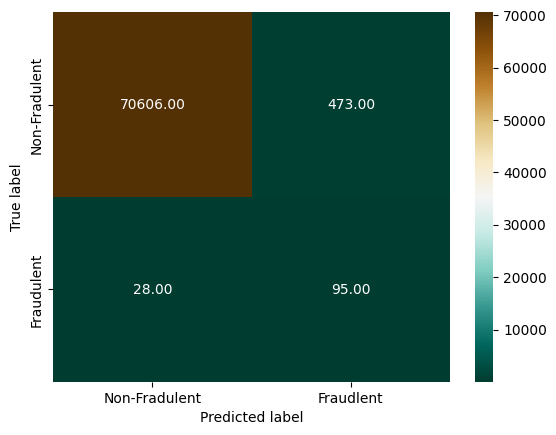

In [ ]:
sns.heatmap(cm, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
sm_dt_row= pd.Series({'Model Name': 'Decision Tree Classifier with SMOTE oversampling', 'Accuracy': accuracy_dt_sm, 'Precision': precision_dt_sm, 'Recall': recall_dt_sm, 'F1-Score': f1_dt_sm, 'ROC AUC': roc_auc_dt_sm})
Evaluation_DT_sam=Evaluation_DT_sam.append(sm_dt_row, ignore_index=True)

<ipython-input-50-36614ab72b7e>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_DT_sam=Evaluation_DT_sam.append(sm_dt_row, ignore_index=True)


In [ ]:
Evaluation_DT_sam

,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Base Decision Tree Classifier,0.999368,0.906250,0.707317,0.794521,0.853595
1,Decision Tree Classifier with Undersampling,0.895537,0.014341,0.878049,0.028221,0.886808
2,Decision Tree Classifier with Oversampling,0.895537,0.754237,0.723577,0.738589,0.861585
3,Decision Tree Classifier with SMOTE oversampling,0.895537,0.164623,0.764228,0.270893,0.878758


# 2.K-Nearest Neighbors

In [ ]:
param_kNN = {
    'n_neighbors': [2,4,6,8,9],
    'weights': ['uniform', 'distance']
    }

In [ ]:
kNN_clf=KNeighborsClassifier()
# Hyperparameter tunning with RandomSeachCV.
random_search_kNN_clf = RandomizedSearchCV(kNN_clf, param_distributions=param_kNN, n_iter=50, scoring='roc_auc',cv=2, random_state=123,verbose=True)


1. Random Undersampling

In [ ]:
# Hyperparameter Tunning with random search cv
random_search_kNN_clf.fit(X_train_un, y_train_un)
best_param_un = random_search_kNN_clf.best_estimator_
best_param_un

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 10 is smaller than n_iter=50. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 10 candidates, totalling 20 fits


KNeighborsClassifier(n_neighbors=9, weights='distance')

In [ ]:
# building kNN Model:
knn_clf_un=KNeighborsClassifier(n_neighbors=9, weights='distance')
# fitting the model:
knn_clf_un.fit(X_train_un, y_train_un)
y_pred_knn_un=knn_clf_un.predict(X_test)

In [ ]:
accuracy_knn_ud=knn_clf_un.score(X_test,y_test)
precision_knn_ud, recall_knn_ud, f1_knn_ud, sup_knn_ud = classification_report(y_test, y_pred_knn_un, output_dict=True)['1'].values()
roc_auc_knn_ud=roc_auc_score(y_test,y_pred_knn_un)
roc_auc_knn_ud


0.9223114507766864

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred_knn_un)
cm

array([[69281,  1798],
       [   16,   107]])

Text(0.5, 23.52222222222222, 'Predicted label')

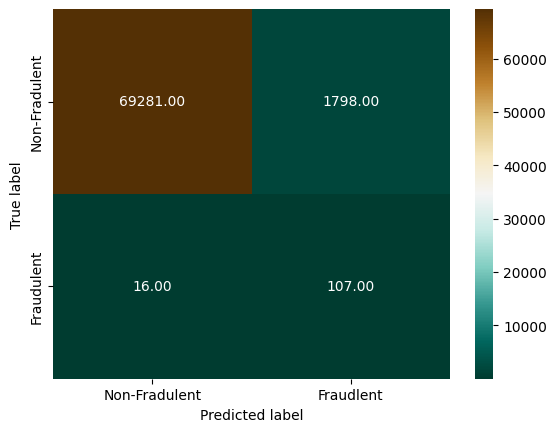

In [ ]:
sns.heatmap(cm, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
# Creating Dataframe for Evalating logistic regression model:
Evaluation_kNN_sam=pd.DataFrame(columns=['Model Name','Accuracy','Precision', 'Recall', 'F1-Score', 'ROC AUC'])
# adding KNN results without sampling
Evaluation_kNN_sam=Evaluation_kNN_sam.append(base_kNN_row, ignore_index=True)

<ipython-input-279-bd4ba6d92c36>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_kNN_sam=Evaluation_kNN_sam.append(base_kNN_row, ignore_index=True)


In [ ]:
ud_knn_row= pd.Series({'Model Name': 'k-nearest neighbors Classifier with Undersampling', 'Accuracy': accuracy_knn_ud, 'Precision': precision_knn_ud, 'Recall': recall_knn_ud, 'F1-Score': f1_knn_ud, 'ROC AUC': roc_auc_knn_ud})
Evaluation_kNN_sam=Evaluation_kNN_sam.append(ud_knn_row, ignore_index=True)

<ipython-input-280-dac7af21d448>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_kNN_sam=Evaluation_kNN_sam.append(ud_knn_row, ignore_index=True)


In [ ]:
Evaluation_kNN_sam

,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,K-Nearest Neighbors Classifier,0.999410,0.945055,0.699187,0.803738,0.849558
1,k-nearest neighbors Classifier with Undersampling,0.974523,0.056168,0.869919,0.105523,0.922311


2.Random Oversampling:

In [ ]:
# Hyperparameter Tunning with random search cv
random_search_kNN_clf.fit(X_train_ov, y_train_ov)
best_param_ov= random_search_kNN_clf.best_estimator_
best_param_ov

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 10 is smaller than n_iter=50. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 10 candidates, totalling 20 fits


KNeighborsClassifier(n_neighbors=2)

In [ ]:
# building Decison tree Model:
knn_clf_ov=KNeighborsClassifier(n_neighbors=8, weights='distance')
# fitting the model:
knn_clf_ov.fit(X_train_ov, y_train_ov)
y_pred_knn_ov=knn_clf_ov.predict(X_test)

In [ ]:
accuracy_ov=knn_clf_ov.score(X_test,y_test)
precision_ov, recall_ov, f1_ov, sup_ov= classification_report(y_test, y_pred_knn_ov, output_dict=True)['1'].values()
roc_auc_ov=roc_auc_score(y_test,y_pred_knn_ov)
roc_auc_ov

0.8979448837243618

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred_knn_ov)
cm

array([[71018,    61],
       [   25,    98]])

Text(0.5, 23.52222222222222, 'Predicted label')

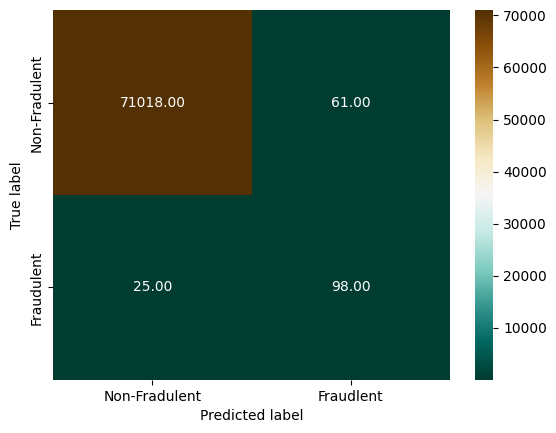

In [ ]:
sns.heatmap(cm, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
ov_knn_row= pd.Series({'Model Name': 'k-nearest neighbors Classifier with Oversampling', 'Accuracy': accuracy_ov, 'Precision': precision_ov, 'Recall': recall_ov, 'F1-Score': f1_ov, 'ROC AUC': roc_auc_ov})
Evaluation_kNN_sam=Evaluation_kNN_sam.append(ov_knn_row, ignore_index=True)
Evaluation_kNN_sam

<ipython-input-289-0030b285ad32>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_kNN_sam=Evaluation_kNN_sam.append(ov_knn_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,K-Nearest Neighbors Classifier,0.999410,0.945055,0.699187,0.803738,0.849558
1,k-nearest neighbors Classifier with Undersampling,0.974523,0.056168,0.869919,0.105523,0.922311
2,k-nearest neighbors Classifier with Oversampling,0.998792,0.616352,0.796748,0.695035,0.897945


3.SMOTE

In [ ]:
# Hyperparameter Tunning with random search cv
random_search_kNN_clf.fit(X_train_ov, y_train_ov)
best_param_sm= random_search_kNN_clf.best_estimator_
best_param_sm

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 10 is smaller than n_iter=50. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 10 candidates, totalling 20 fits


KNeighborsClassifier(n_neighbors=2)

In [ ]:
# building Decison tree Model:
kNN_clf_sm=KNeighborsClassifier(n_neighbors=8, weights='distance')
# fitting the model:
kNN_clf_sm.fit(X_train_sm, y_train_sm )
y_pred_kNN_sm=kNN_clf_sm.predict(X_test)

In [ ]:
accuracy_sm=kNN_clf_sm.score(X_test,y_test)
precision_sm, recall_sm, f1_sm, sup_sm = classification_report(y_test, y_pred_kNN_sm, output_dict=True)['1'].values()
roc_auc_sm=roc_auc_score(y_test,y_pred_kNN_sm)
roc_auc_sm

0.9092325646592473

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred_kNN_sm)
cm

array([[70889,   190],
       [   22,   101]])

Text(0.5, 23.52222222222222, 'Predicted label')

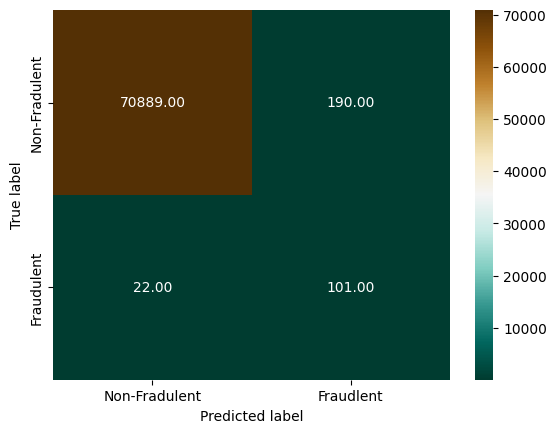

In [ ]:
sns.heatmap(cm, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
sm_knn_row= pd.Series({'Model Name': 'k-nearest neighbors Classifier with  SMOTE Oversampling', 'Accuracy': accuracy_sm, 'Precision': precision_sm, 'Recall': recall_sm, 'F1-Score': f1_sm, 'ROC AUC': roc_auc_sm})
Evaluation_kNN_sam=Evaluation_kNN_sam.append(sm_knn_row, ignore_index=True)
Evaluation_kNN_sam

<ipython-input-291-4dceec69d9b3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_kNN_sam=Evaluation_kNN_sam.append(sm_knn_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,K-Nearest Neighbors Classifier,0.999410,0.945055,0.699187,0.803738,0.849558
1,k-nearest neighbors Classifier with Undersampling,0.974523,0.056168,0.869919,0.105523,0.922311
2,k-nearest neighbors Classifier with Oversampling,0.998792,0.616352,0.796748,0.695035,0.897945
3,k-nearest neighbors Classifier with SMOTE Ove...,0.997023,0.347079,0.821138,0.487923,0.909233


# 3.Random Forest

Sampling data for Random forest with selected features

In [ ]:
Resample_Rf_data=df1.iloc[:,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 29,30]]
Resample_Rf_data.shape

(284807, 26)

In [ ]:
# train-test split and scaling
X_rf=Resample_Rf_data.drop(["Class"],axis=1)
y_rf=Resample_Rf_data["Class"]
X_train_rf,X_test_rf,y_train_rf,y_test_rf=train_test_split(X_rf,y_rf,stratify=y_rf, test_size = 0.25,random_state=123)
scale = RobustScaler()
X_train_rf=scale.fit_transform(X_train_rf)
X_test_rf=scale.fit_transform(X_test_rf)

In [ ]:
# uderrdampling
X_train_rf_un, y_train_rf_un = rs_under.fit_resample(X_train_rf,y_train_rf)
# Oversampling
X_train_rf_ov, y_train_rf_ov = rs_over.fit_resample(X_train_rf,y_train_rf)
# SMOTE
X_train_rf_sm, y_train_rf_sm = smote.fit_resample(X_train_rf,y_train_rf)


In [ ]:
param_grid_rf = {
    'n_estimators': [50,70, 90,110],
    'max_features': [5,6,7],
                     }

In [ ]:
rf_clf=RandomForestClassifier()
# Hyperparameter tunning with RandomSeachCV.
random_search_rf_clf = RandomizedSearchCV(rf_clf, param_distributions=param_grid_rf, n_iter=50, scoring='roc_auc',cv=2, random_state=123,verbose=True)


1. Random Undersampling

In [ ]:
# Hyperparameter Tunning with random search cv
random_search_rf_clf.fit(X_train_rf_un, y_train_rf_un)
best_param = random_search_rf_clf.best_estimator_
best_param

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 12 candidates, totalling 24 fits


RandomForestClassifier(max_features=6, n_estimators=70)

In [ ]:
# building Decison tree Model:
rf_clf_un=RandomForestClassifier(max_features=6, n_estimators=70)
# fitting the model:
rf_clf_un.fit(X_train_rf_un, y_train_rf_un)
y_pred_rf_un=rf_clf_un.predict(X_test_rf)

In [ ]:
print("Base Decision Tree Classification Report:")
print(classification_report(y_test_rf, y_pred_rf_un))

Base Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71079
           1       0.05      0.86      0.10       123

    accuracy                           0.97     71202
   macro avg       0.53      0.92      0.54     71202
weighted avg       1.00      0.97      0.98     71202



In [ ]:
accuracy=rf_clf_un.score(X_test_rf,y_test_rf)
precision, recall, f1, sup = classification_report(y_test_rf, y_pred_rf_un, output_dict=True)['1'].values()
roc_auc=roc_auc_score(y_test,y_pred_rf_un)
roc_auc

0.9210733917156417

In [ ]:
cm = metrics.confusion_matrix(y_test_rf,y_pred_rf_un)
cm

array([[69136,  1943],
       [   17,   106]])

Text(0.5, 23.52222222222222, 'Predicted label')

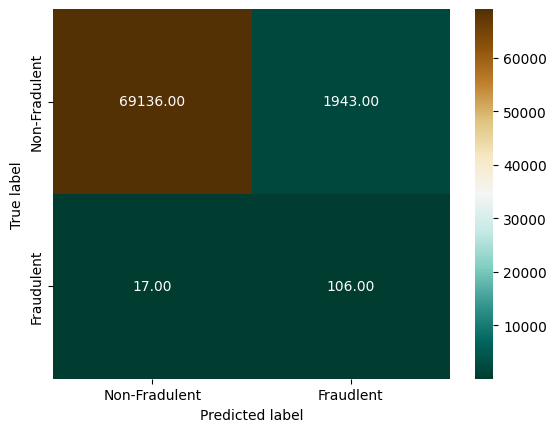

In [ ]:
sns.heatmap(cm, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
# Creating Dataframe for Evalating logistic regression model:
Evaluation_RF_sam=pd.DataFrame(columns=['Model Name','Accuracy','Precision', 'Recall', 'F1-Score', 'ROC AUC'])
# Addiding evaluation measures of randon forest classifier with resampling
Evaluation_RF_sam=Evaluation_RF_sam.append(rf_score, ignore_index=True)


<ipython-input-100-e27242c1a3f5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_RF_sam=Evaluation_RF_sam.append(rf_score, ignore_index=True)


In [ ]:
un_rf_row= pd.Series({'Model Name': 'Random Forest Classifier with  Undersampling', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'ROC AUC': roc_auc})
Evaluation_RF_sam=Evaluation_RF_sam.append(un_rf_row, ignore_index=True)
Evaluation_RF_sam

<ipython-input-101-ad46dcf832dd>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_RF_sam=Evaluation_RF_sam.append(un_rf_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Random Forest Classifier,0.999396,0.925532,0.707317,0.801843,0.853609
1,Random Forest Classifier with Undersampling,0.972051,0.051418,0.869919,0.097096,0.921073


2.Random Oversampling:

In [ ]:
# Hyperparameter Tunning with random search cv
random_search_rf_clf.fit(X_train_rf_ov, y_train_rf_ov)
best_param_ov = random_search_rf_clf.best_estimator_
best_param_ov

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 12 candidates, totalling 24 fits


RandomForestClassifier(max_features=5, n_estimators=90)

In [ ]:
# building Decison tree Model:
rf_clf_ov=RandomForestClassifier(max_features=5, n_estimators=90,random_state=123)
# fitting the model:
rf_clf_ov.fit(X_train_rf_ov, y_train_rf_ov)
y_pred_rf_ov=rf_clf_ov.predict(X_test_rf)

In [ ]:
print("Base Decision Tree Classification Report:")
print(classification_report(y_test_rf, y_pred_rf_ov))

Base Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.75      0.84       123

    accuracy                           1.00     71202
   macro avg       0.97      0.87      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
accuracy=rf_clf_ov.score(X_test_rf,y_test_rf)
precision, recall, f1, sup = classification_report(y_test_rf, y_pred_rf_ov, output_dict=True)['1'].values()
roc_auc=roc_auc_score(y_test_rf,y_pred_rf_ov)
roc_auc

0.8739485677049823

In [ ]:
cm = metrics.confusion_matrix(y_test_rf,y_pred_rf_ov)
cm

array([[71074,     5],
       [   31,    92]])

Text(0.5, 23.52222222222222, 'Predicted label')

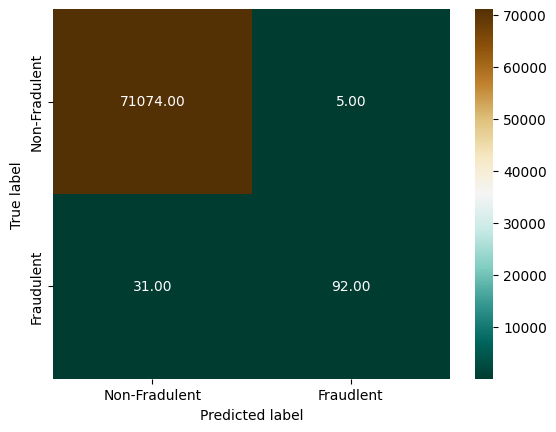

In [ ]:
sns.heatmap(cm, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
ov_rf_row= pd.Series({'Model Name': 'Random Forest Classifier with Oversampling', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'ROC AUC': roc_auc})
Evaluation_RF_sam=Evaluation_RF_sam.append(ov_rf_row, ignore_index=True)
Evaluation_RF_sam

<ipython-input-104-397e4e628a6d>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_RF_sam=Evaluation_RF_sam.append(ov_rf_row, ignore_index=True)


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Random Forest Classifier,0.999396,0.925532,0.707317,0.801843,0.853609
1,Random Forest Classifier with Undersampling,0.972051,0.051418,0.869919,0.097096,0.921073
2,Random Forest Classifier with Oversampling,0.999494,0.948454,0.747967,0.836364,0.873949


3.SMOTE

In [ ]:
# Hyperparameter Tunning with random search cv
random_search_rf_clf.fit(X_train_rf_sm, y_train_rf_sm)
best_param_sm = random_search_rf_clf.best_estimator_
best_param_sm

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 12 candidates, totalling 24 fits


RandomForestClassifier(max_features=5, n_estimators=70)

In [ ]:
# building Decison tree Model:
rf_clf_sm=RandomForestClassifier(max_features=5, n_estimators=70)
# fitting the model:
rf_clf_sm.fit(X_train_rf_sm, y_train_rf_sm)
y_pred_rf_sm=rf_clf_sm.predict(X_test_rf)

In [ ]:
print("Base Decision Tree Classification Report:")
print(classification_report(y_test_rf, y_pred_rf_sm))

Base Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.86      0.76      0.81       123

    accuracy                           1.00     71202
   macro avg       0.93      0.88      0.90     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
accuracy=rf_clf_sm.score(X_test_rf,y_test_rf)
precision, recall, f1, sup = classification_report(y_test_rf, y_pred_rf_sm, output_dict=True)['1'].values()
roc_auc=roc_auc_score(y_test_rf,y_pred_rf_sm)
roc_auc

0.8779573329435232

In [ ]:
cm = metrics.confusion_matrix(y_test_rf,y_pred_rf_sm)
cm

array([[71064,    15],
       [   30,    93]])

Text(0.5, 23.52222222222222, 'Predicted label')

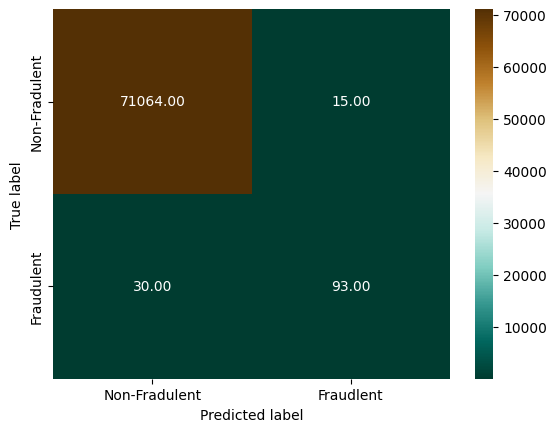

In [ ]:
sns.heatmap(cm, annot=True,  fmt='.2f', cmap=plt.cm.BrBG_r, xticklabels = ["Non-Fradulent","Fraudlent"] , yticklabels = [ "Non-Fradulent","Fraudulent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
sm_rf_row= pd.Series({'Model Name': 'Random Forest Classifier with SMOTE', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'ROC AUC': roc_auc})
Evaluation_RF_sam=Evaluation_RF_sam.append(sm_rf_row, ignore_index=True)

<ipython-input-107-aa9d551f7f0e>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Evaluation_RF_sam=Evaluation_RF_sam.append(sm_rf_row, ignore_index=True)


In [ ]:
Evaluation_RF_sam

,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Random Forest Classifier,0.999396,0.925532,0.707317,0.801843,0.853609
1,Random Forest Classifier with Undersampling,0.972051,0.051418,0.869919,0.097096,0.921073
2,Random Forest Classifier with Oversampling,0.999494,0.948454,0.747967,0.836364,0.873949
3,Random Forest Classifier with SMOTE,0.999396,0.877358,0.756098,0.812227,0.877957


The final model selected in the  study is Random Forest classifier with randomly oversampled data. It presents the best balance Evaluation metrices